#### Auteur: Irina Maslowski

### Projet N° 4 Segmentez des clients d'un site e-commerce

Clustering de 13 variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt

In [102]:
from time import time
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, QuantileTransformer

In [3]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from collections import OrderedDict
from scipy.cluster.hierarchy import dendrogram

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
from sklearn.neighbors import NearestNeighbors

## Sommaire:
* [Chargement des données](#first-bullet)
    * [Mise à l'échelle des données](#X_scaled)
    * [Echantillon de données](#50perc_sample)
* [Grille de recherche de meilleurs paramètres pour kmeans](#grille_kmeans)
    * [K-means avec les meilleurs paramètres](#kmeans_best)
    * [Visualisation de 3 clusters obtenus](#kmeans_best_viz)
    * [Analyse des 3 clusters kmeans obtenus](#kmeans_best_analysis)
* [Classification ascendante hiérarchique (CAH)](#cah)
    * [Visualisation de 3 clusters HCA obtenus](#hca3_best_viz)
    * [Visualisation de 4 clusters HCA obtenus](#hca4_best_viz)
    * [Analyse des 4 clusters obtenus](#hca4_analysis)
* [DBSCAN clustering algorithm](#dbscan)
    * [Visualisation de clusters DBscan obtenus](#dbscan_viz)
* [Test de RobustScaler](#robust_scaler)
* [Test de QuantileTransformer](#quantile_transformer)

# Chargement des données <a class="anchor" id="first-bullet"></a>

In [8]:
df_customer_unique = pd.read_excel('C:/Users/piari/Documents/Projet4_ecommerce/df_customer_unique.xlsx')

In [9]:
df_customer_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93342 entries, 0 to 93341
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   order_id_nunique                             93342 non-null  int64  
 1   delta_date_order_first                       93342 non-null  float64
 2   delta_date_order_last                        93342 non-null  float64
 3   freight_value_max                            93342 non-null  float64
 4   contain_message_most_frequent                93342 non-null  bool   
 5   payment_type_most_frequent                   93342 non-null  object 
 6   product_category_name_most_frequent          93342 non-null  object 
 7   review_score_min                             93342 non-null  int64  
 8   delivery_period_max                          93342 non-null  float64
 9   delivered_sum                                93342 non-null  int64  
 10

In [10]:
X = df_customer_unique.drop(['payment_type_most_frequent', 'product_category_name_most_frequent',
                             'most_frequent_general_product_category_name', 'contain_message_most_frequent',
                             'order_status_most_frequent', 'delivered_sum', 'in_progress_sum', 'unavailable_sum',
                             'canceled_sum'], axis=1).copy()

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93342 entries, 0 to 93341
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   order_id_nunique                  93342 non-null  int64  
 1   delta_date_order_first            93342 non-null  float64
 2   delta_date_order_last             93342 non-null  float64
 3   freight_value_max                 93342 non-null  float64
 4   review_score_min                  93342 non-null  int64  
 5   delivery_period_max               93342 non-null  float64
 6   product_volume_cm3_most_frequent  93342 non-null  float64
 7   intime_delivery_mean              93342 non-null  float64
 8   payment_sequential_mean           93342 non-null  float64
 9   payment_installments_mean         93342 non-null  float64
 10  customer_seller_distance_mean     93342 non-null  float64
 11  purchase_frequency_               93342 non-null  float64
 12  aver

In [12]:
X.rename(columns={"order_id_nunique": "purchase_number"}, inplace = True)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93342 entries, 0 to 93341
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   purchase_number                   93342 non-null  int64  
 1   delta_date_order_first            93342 non-null  float64
 2   delta_date_order_last             93342 non-null  float64
 3   freight_value_max                 93342 non-null  float64
 4   review_score_min                  93342 non-null  int64  
 5   delivery_period_max               93342 non-null  float64
 6   product_volume_cm3_most_frequent  93342 non-null  float64
 7   intime_delivery_mean              93342 non-null  float64
 8   payment_sequential_mean           93342 non-null  float64
 9   payment_installments_mean         93342 non-null  float64
 10  customer_seller_distance_mean     93342 non-null  float64
 11  purchase_frequency_               93342 non-null  float64
 12  aver

## Mise à l'échelle des données <a class="anchor" id="X_scaled"></a>

In [103]:
# pour la visualisation
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## Echantillon de données <a class="anchor" id="50perc_sample"></a>

In [14]:
# A random 50% sample of the DataFrame
# df.sample(frac=0.5, replace=True, random_state=1)
X_50perc_sample = X.sample(frac=0.5, random_state=1)

In [183]:
X_50perc_sample

purchase_number  delta_date_order_first  delta_date_order_last  \
55876                1              160.205162             160.205162   
86488                1              254.724086             254.724086   
78366                1               64.033345              64.033345   
41490                1              320.868669             320.868669   
44306                1               67.164213              67.164213   
...                ...                     ...                    ...   
45240                1               63.697164              63.697164   
51500                1              387.091921             387.091921   
87846                1               65.817361              65.817361   
19247                1               74.975475              74.975475   
33984                1              181.298646             181.298646   

       freight_value_max  review_score_min  delivery_period_max  \
55876              17.19                 5             8.477847   
86488              13.37                 5             9.895093   
78366              23.54                 5             8.306806   
41490              16.40                 5             6.008727   
44306              38.46                 3            13.472269   
...                  ...               ...                  ...   
45240              15.83                 4             5.711863   
51500              18.65                 3            14.182037   
87846              13.83                 5             4.802292   
19247              51.44                 5            21.032685   
33984              13.84                 4             7.575451   

       product_volume_cm3_most_frequent  intime_delivery_mean  \
55876                          0.002992             15.997940   
86488                          0.027000             21.099618   
78366                          0.024000              6.997164   
41490                          0.003300             21.130567   
44306                          0.008400              3.962569   
...                                 ...                   ...   
45240                          0.002816              3.255926   
51500                          0.012672             13.180509   
87846                          0.004620              5.285694   
19247                          0.002772              5.213414   
33984                          0.001188             11.993819   

       payment_sequential_mean  payment_installments_mean  \
55876                      1.0                        8.0   
86488                      1.0                        4.0   
78366                      1.0                        2.0   
41490                      1.0                        3.0   
44306                      1.5                        1.0   
...                        ...                        ...   
45240                      1.0                        3.0   
51500                      1.0                        3.0   
87846                      1.0                        1.0   
19247                      1.0                        2.0   
33984                      1.0                        1.0   

       customer_seller_distance_mean  purchase_frequency_  \
55876                     646.012358                  0.0   
86488                     201.608031                  0.0   
78366                     816.408945                  0.0   
41490                     153.771483                  0.0   
44306                    1194.502052                  0.0   
...                              ...                  ...   
45240                     128.777491                  0.0   
51500                     821.230378                  0.0   
87846                     517.439295                  0.0   
19247                    1818.646608                  0.0   
33984                     502.982851                  0.0   

       average_consumer_basket_  
55876                    162.19  
86488     

In [184]:
std_scale_X_50perc_sample = preprocessing.StandardScaler().fit(X_50perc_sample)
X_50perc_sample_scaled = std_scale_X_50perc_sample.transform(X_50perc_sample)

## ACP sur l'échantillon de 50% de dataset <a class="anchor" id="pca_50"></a>

In [193]:
acp = PCA(n_components=8)

In [194]:
acp.fit(X_50perc_sample_scaled)

PCA(n_components=8)

In [195]:
pcs = acp.components_

(-0.7, 0.7)

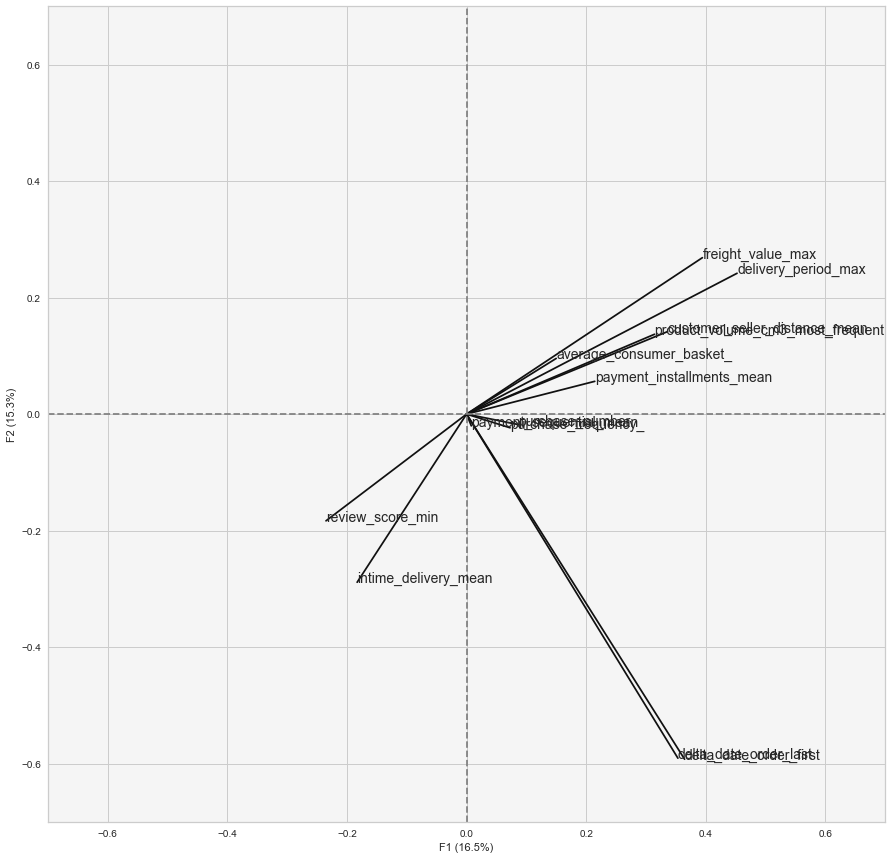

In [196]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

    
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*acp.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*acp.explained_variance_ratio_[1],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(-0.7, 0.7)

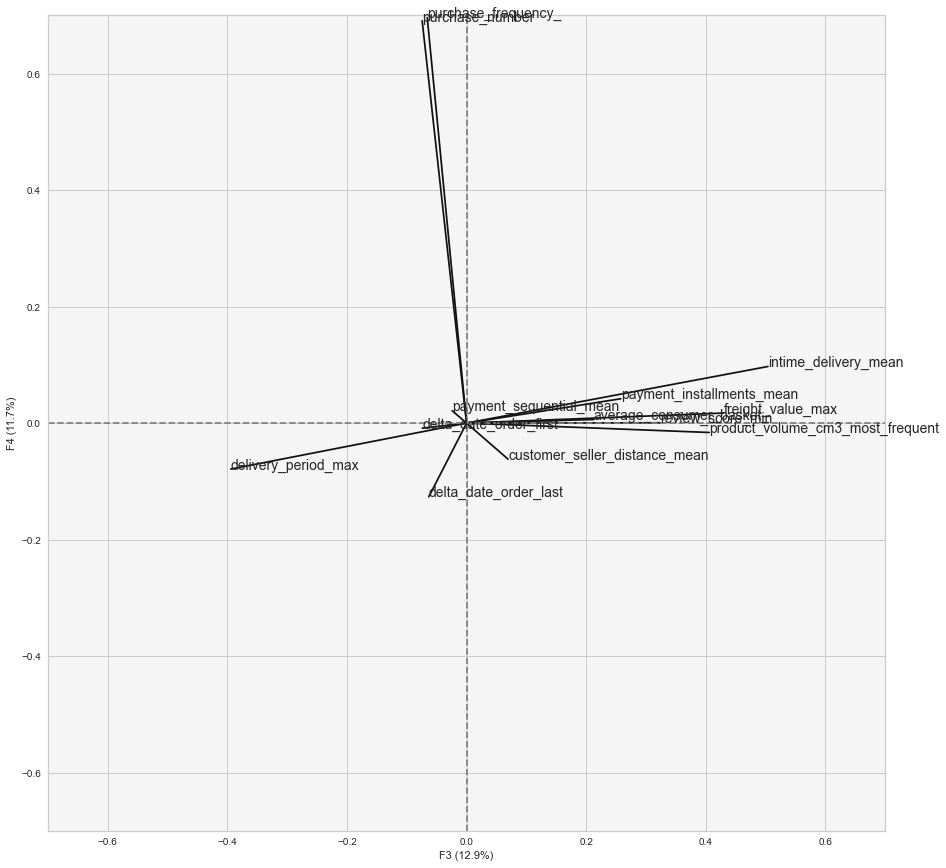

In [197]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(2+1, round(100*acp.explained_variance_ratio_[2],1)))
plt.ylabel('F{} ({}%)'.format(3+1, round(100*acp.explained_variance_ratio_[3],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

# Grille de recherche de meilleurs paramètres pour kmeans <a class="anchor" id="grille_kmeans"></a>

In [22]:
#StandardScaler(), PCA(n_components=n)

df_res_kmeans = pd.DataFrame(columns=['n_components', 'n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])


for n in range(2,10):
    for k in range(3,10):
        pca = PCA(n_components=n)
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        estimator = make_pipeline(StandardScaler(), pca, kmeans).fit(X_50perc_sample)
        labels_k = kmeans.labels_
        #print(data["clusters"])
        inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center = SSE
        db_score = davies_bouldin_score(X_50perc_sample, labels_k)
        silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
        df_res_kmeans = df_res_kmeans.append({'n_components':n, 'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_kmeans = df_res_kmeans.set_index('n_clusters')



In [23]:
df_res_kmeans

n_components        inertia  silhouette_score  \
n_clusters                                                  
3.0                  2.0   76036.382778          0.137749   
4.0                  2.0   62142.755437          0.106465   
5.0                  2.0   49593.322679          0.016090   
6.0                  2.0   42099.106969          0.021554   
7.0                  2.0   36559.364615          0.009298   
8.0                  2.0   32549.370273         -0.022115   
9.0                  2.0   29310.893830         -0.029636   
3.0                  3.0  153532.466771          0.132052   
4.0                  3.0  120327.397002          0.110458   
5.0                  3.0  106129.775503          0.030638   
6.0                  3.0   93818.886961          0.015138   
7.0                  3.0   84021.007491         -0.009339   
8.0                  3.0   77316.537689         -0.001296   
9.0                  3.0   72082.594881         -0.008624   
3.0                  4.0  224503.264475          0.036994   
4.0                  4.0  174110.229201          0.086279   
5.0                  4.0  141155.103244          0.066960   
6.0                  4.0  126998.277139          0.030276   
7.0                  4.0  114747.754222          0.014567   
8.0                  4.0  104217.529820          0.010610   
9.0                  4.0   94677.974049         -0.014002   
3.0                  5.0  275055.110814          0.128815   
4.0                  5.0  224834.002092          0.098711   
5.0                  5.0  191638.597310          0.060717   
6.0                  5.0  168998.770037          0.161195   
7.0                  5.0  155647.585591          0.085023   
8.0                  5.0  145177.760852          0.079754   
9.0                  5.0  135368.668086          0.074379   
3.0                  6.0  323120.138176          0.129417   
4.0                  6.0  272897.016720          0.096567   
5.0                  6.0  239042.075362          0.060835   
6.0                  6.0  215619.679610          0.161765   
7.0                  6.0  197899.806188          0.157822   
8.0                  6.0  184571.416933          0.085841   
9.0                  6.0  174606.586941          0.081281   
3.0                  7.0  367000.052846          0.130227   
4.0                  7.0  316765.678545          0.095576   
5.0                  7.0  281802.554354          0.060550   
6.0                  7.0  257551.369068          0.159593   
7.0                  7.0  237833.772285          0.155853   
8.0                  7.0  224573.268373          0.080891   
9.0                  7.0  205312.178117          0.083929   
3.0                  8.0  406531.024312          0.128737   
4.0                  8.0  356253.819354          0.096344   
5.0                  8.0  321023.016094          0.059335   
6.0                  8.0  296654.645391          0.160696   
7.0                  8.0  273595.592593          0.161073   
8.0                  8.0  251618.495561          0.157239   
9.0                  8.0  236692.028572          0.126911   
3.0                  9.0  442186.689545          0.129646   
4.0                  9.0  391865.133492          0.095077   
5.0                  9.0  356563.194606          0.056828   
6.0                  9.0  332134.077307          0.160011   
7.0                  9.0  307881.078288          0.160235   
8.0                  9.0  286275.846765          0.156495   
9.0                  9.0  269263.029181          0.105705   

            davies_bouldin_score  
n_clusters                        
3.0                     2.049408  
4.0                     2.728652  
5.0                     2.981252  
6.0                     3.190048  
7.0                     3.353259  
8.0                     3.388480  
9.0                     3.589215  
3.0                     2.095697  
4.0                     2.810893  
5.0                     3.178957  
6.0                     3.585243  
7.0               

In [18]:
def plot_score(df_score, x):
    fig = plt.figure(figsize=(14,7))
    fig.add_subplot(221)
    plt.plot(df_score['inertia'],'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.legend()
    ax1 = fig.add_subplot(222)
    ax2 = ax1.twinx()
    df_score.plot(ax=ax1, y='silhouette_score', color='r',label='Silhouette Score')
    df_score.plot(ax=ax2, y='davies_bouldin_score', color='g',label='Score de Davies Bouldin')
    plt.xlabel("Number of cluster")
#     plt.ylabel("Silhouette & Davies Bouldin Scores")
    ax1.set_ylabel('silhouette_score')
    ax2.set_ylabel('davies_bouldin_score')
    plt.legend()
#     fig.add_subplot(223)
    
    
    plt.axvline(x, color='k', linestyle='--')
    
#     plt.xlabel("Number of cluster")
#     plt.ylabel("Davies Bouldin score")
#     plt.legend()
    plt.show()

<AxesSubplot:xlabel='n_clusters', ylabel='n_components'>

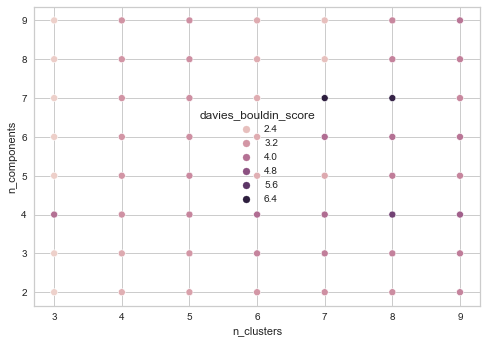

In [24]:
sns.scatterplot(data=df_res_kmeans, x="n_clusters", y="n_components", hue="davies_bouldin_score")

In [20]:
# min-max normalization:
# normalized_df=(df-df.min())/(df.max()-df.min())
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

def _norm(df, col):
    return (df[col] - df[col].min()) / (df[col].max() - df[col].min())

n_components : 2


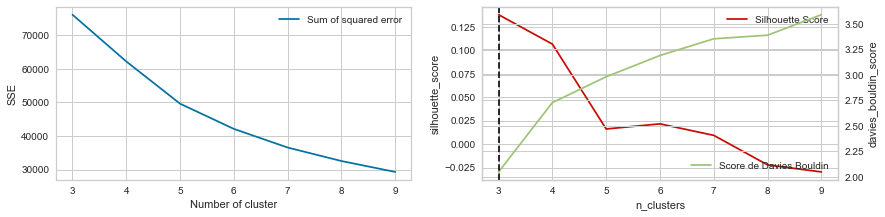

n_components : 3


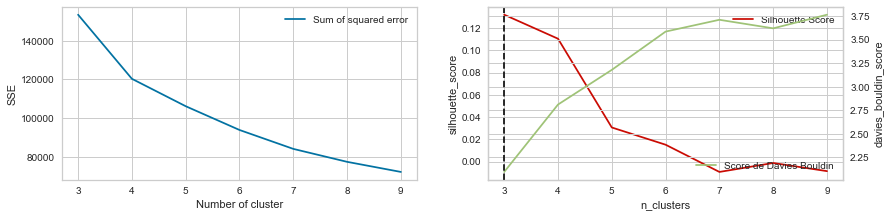

n_components : 4


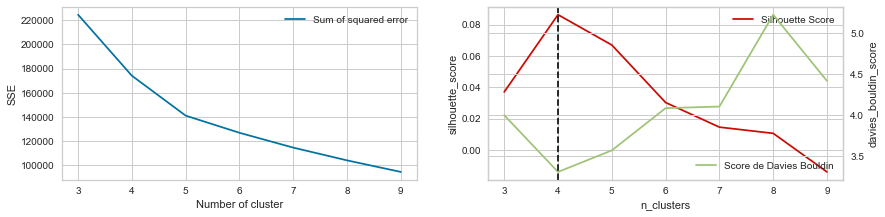

n_components : 5


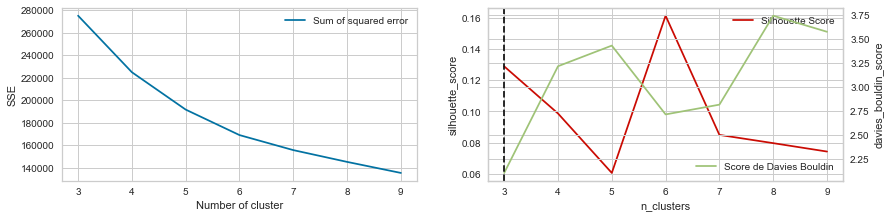

n_components : 6


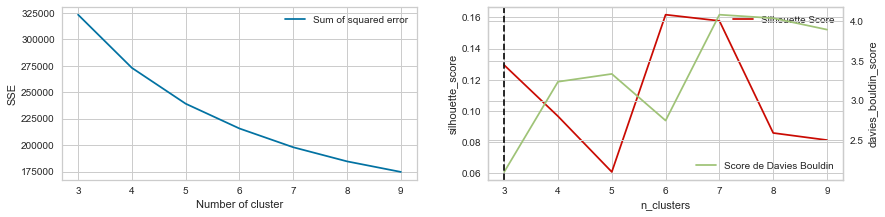

n_components : 7


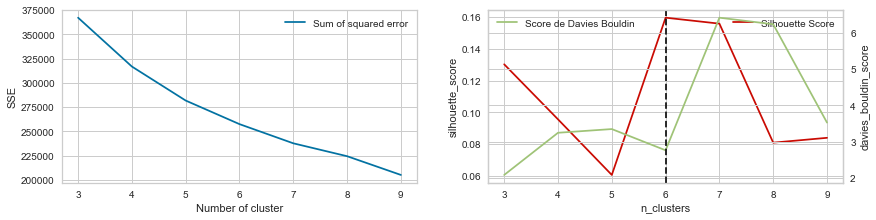

n_components : 8


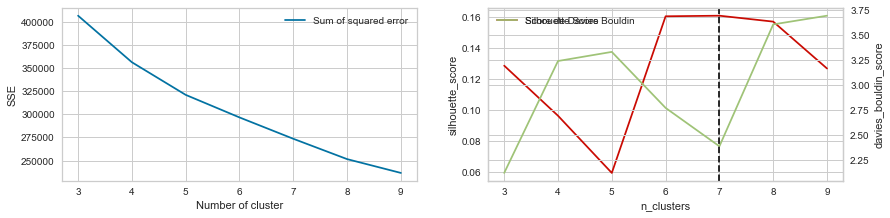

n_components : 9


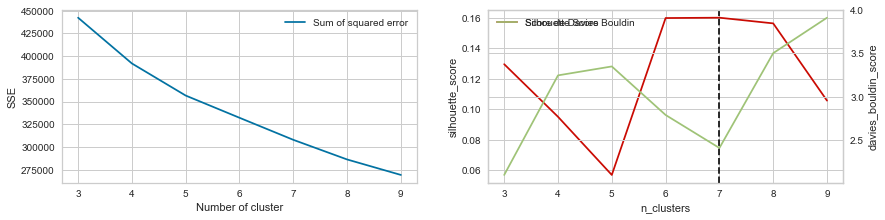

In [25]:
# affichage des résultats sur des graphiques
df_best_res = pd.DataFrame(columns=['n_components', 'max_norm'])

for n in range(2,10):
    mini_res = df_res_kmeans[df_res_kmeans['n_components'] == n].copy()
    max_silhoutte = mini_res['silhouette_score'].max()
    mini_res['sil_norm'] = _norm(mini_res, 'silhouette_score')
    mini_res['boul_norm'] = 1 - _norm(mini_res, 'davies_bouldin_score')
    mini_res['max'] = mini_res['sil_norm'] * 0.5 +  mini_res['boul_norm'] * 0.5
    best_score = mini_res['max'].max()
    
    df_best_res = df_best_res.append({'n_components':n, 'max_norm':best_score}, ignore_index=True)
#     print('max de score de silhouette est', max_silhoutte, 'lorsque le nombre de clusters est à ', 
#           mini_res[mini_res['silhouette_score'] == max_silhoutte].index)
#     min_bouldin = mini_res['davies_bouldin_score'].min()
#     print('min de score de davies bouldin est', min_bouldin, 'lorsque le nombre de clusters est à ', 
#           mini_res[mini_res['davies_bouldin_score'] == min_bouldin].index)
    print('n_components :', n)
    plot_score(mini_res, mini_res[mini_res['max'] == best_score].index)

In [26]:
df_best_res.style.highlight_max(subset=['max_norm'], color='#6EA4EC')

## K-means avec les meilleurs paramètres <a class="anchor" id="kmeans_best"></a>

In [27]:
# les meilleurs paramètres du test précédant : PCA à 3 composants + kmeans avec k=3
pca_best = PCA(n_components=2)
kmeans_best = KMeans(n_clusters=3, max_iter=1000)
estimator_best = make_pipeline(StandardScaler(), pca_best, kmeans_best).fit(X_50perc_sample)
labels_kbest = kmeans_best.labels_
#print(data["clusters"])
inert_best = kmeans_best.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
db_score_best = davies_bouldin_score(X_50perc_sample, labels_kbest)
silh_score_best = metrics.silhouette_score(X_50perc_sample, labels_kbest, metric='euclidean')

In [28]:
print('Inertia :', inert_best, ' Davies Bouldin score : ', db_score_best, ' Silhouette score : ', silh_score_best)

Inertia : 76037.36924708587  Davies Bouldin score :  2.0466082362816214  Silhouette score :  0.13859953752690923


For n_clusters = 3 The average silhouette_score is : 0.4275091393752417


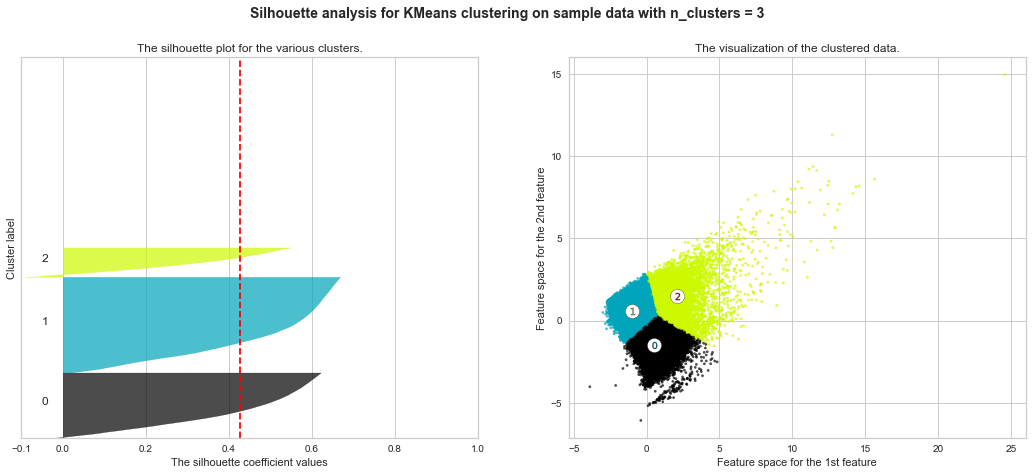

In [105]:
n_clusters = 3

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X_50perc_sample_scaled)


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, labels_kbest)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, labels_kbest)

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[labels_kbest == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(labels_kbest.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans_best.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

## Visualisation de 3 clusters kmeans obtenus <a class="anchor" id="kmeans_best_viz"></a>

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

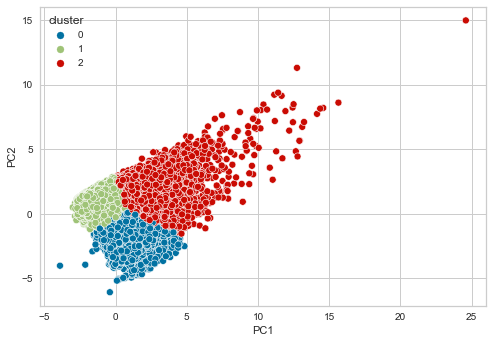

In [106]:
pca_X_50perc = pd.DataFrame(PCA(n_components=2).fit_transform(X_50perc_sample_scaled),columns=['PC1','PC2'])
pca_X_50perc['cluster'] = pd.Categorical(labels_kbest)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_X_50perc)

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

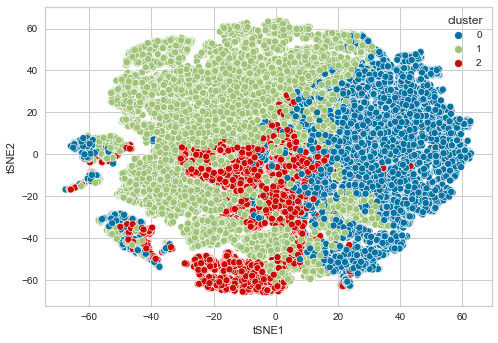

In [107]:
# affichage tSNE
tsne_affichage = TSNE(n_components=2)
X50perc_tsne = pd.DataFrame(tsne_affichage.fit_transform(X_50perc_sample_scaled),columns=['tSNE1','tSNE2'])
X50perc_tsne['cluster'] = pd.Categorical(labels_kbest)
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster",data=X50perc_tsne)

## Analyse des 3 clusters kmeans obtenus <a class="anchor" id="kmeans_best_analysis"></a>

In [32]:
X50perc_clustered = X_50perc_sample.copy()
X50perc_clustered['cluster'] = pd.Categorical(labels_kbest)

<Figure size 576x396 with 0 Axes>

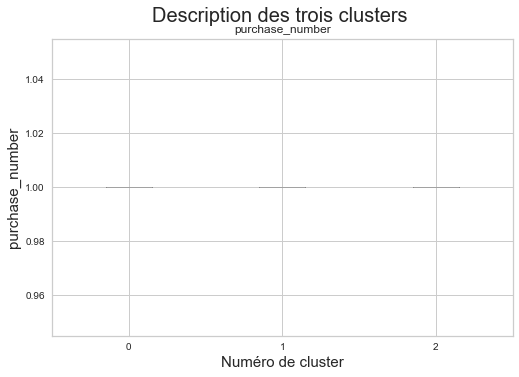

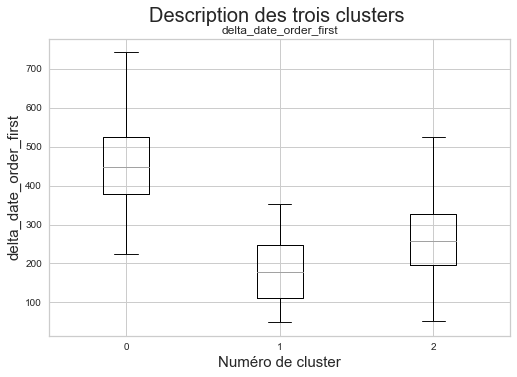

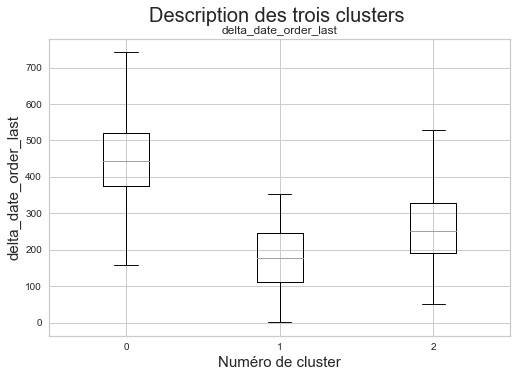

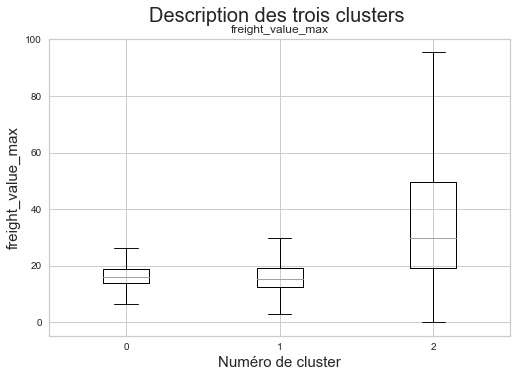

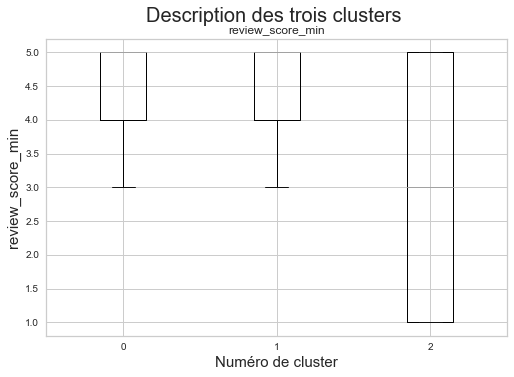

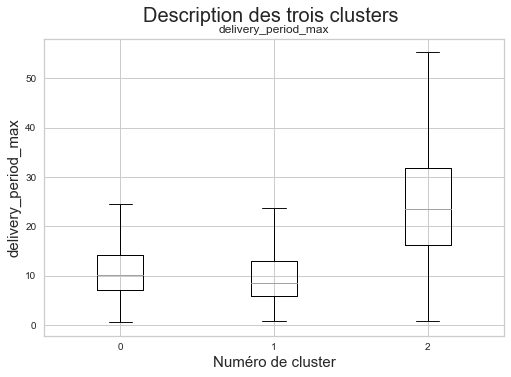

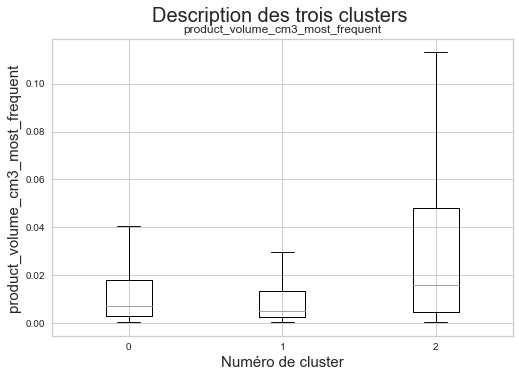

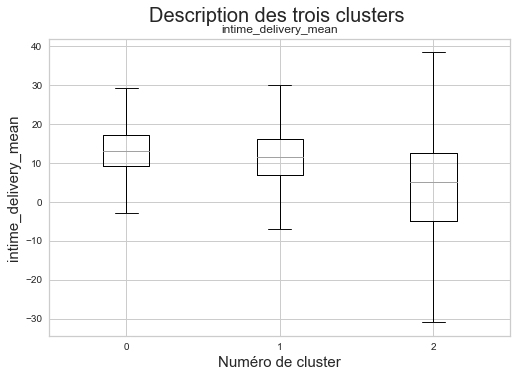

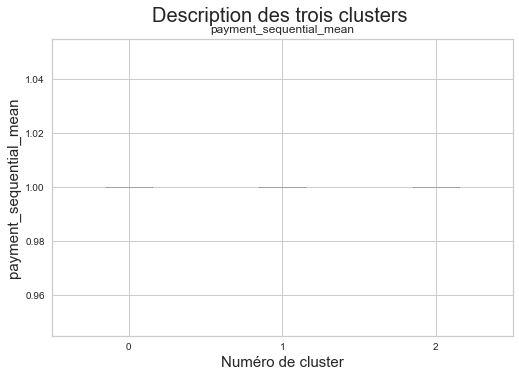

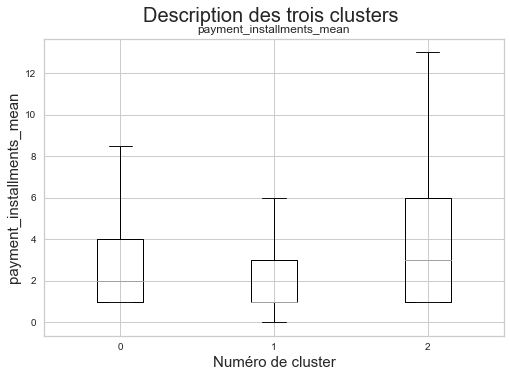

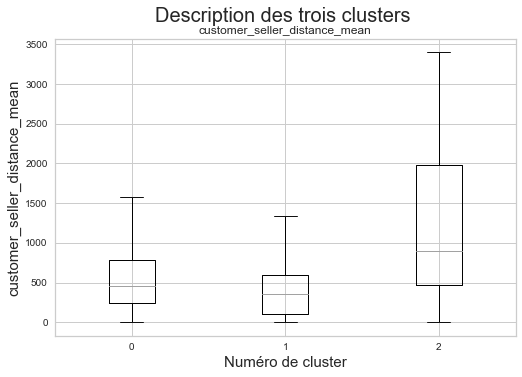

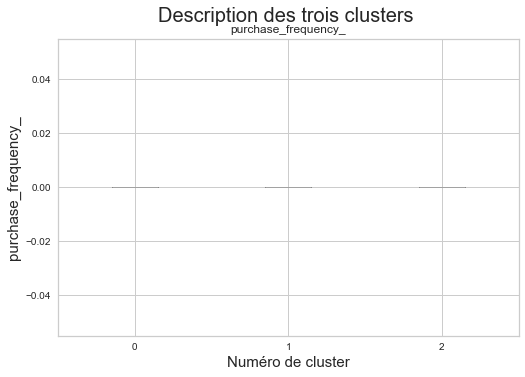

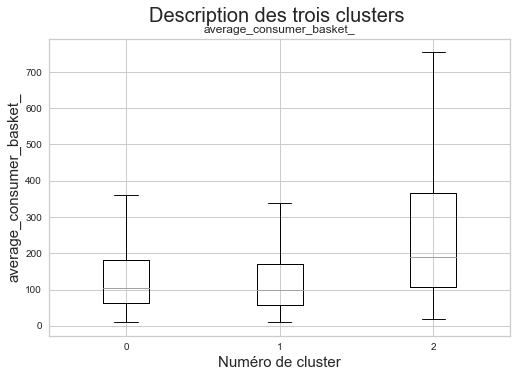

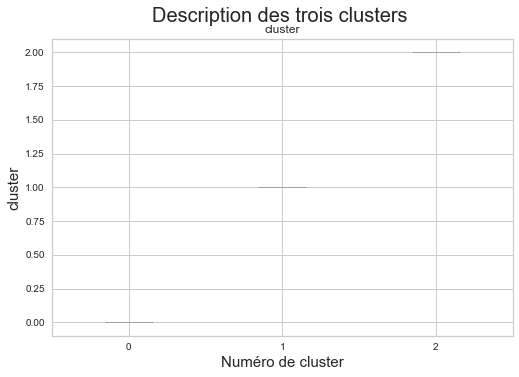

In [33]:
plt.figure()

for col in X50perc_clustered.columns:
    X50perc_clustered.boxplot(column=[col], by= X50perc_clustered['cluster'], showfliers=False)
# plt.title('AAA')
    plt.suptitle('Description des trois clusters ', fontsize = 20) # 
    plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel(f'{col}', fontsize = 15) # y-axis label with fontsize 15
    plt.show()

In [34]:
# attribution de noms aux clusters
X50perc_tsne['cluster']

0        1
1        1
2        1
3        0
4        1
        ..
46666    1
46667    0
46668    1
46669    2
46670    1
Name: cluster, Length: 46671, dtype: category
Categories (3, int64): [0, 1, 2]

In [157]:
X50perc_tsne['cluster_name'] = np.where((X50perc_tsne['cluster'] == 1),'nouveau_client', X50perc_tsne['cluster'])

In [158]:
# X50perc_tsne['cluster_name'] = np.where((X50perc_tsne['cluster'] == 1),'client_mécontant', X50perc_tsne['cluster_name'])
X50perc_tsne['cluster_name'] = np.where((X50perc_tsne['cluster'] == 0),'client_dormant', X50perc_tsne['cluster_name'])

In [159]:
#  X50perc_tsne['cluster_name'] = np.where((X50perc_tsne['cluster'] == 2),'client_dormant', X50perc_tsne['cluster_name'])
X50perc_tsne['cluster_name'] = np.where((X50perc_tsne['cluster'] == 2),'client_mécontant', X50perc_tsne['cluster_name'])

In [160]:
X50perc_tsne['cluster_name']

0          nouveau_client
1          nouveau_client
2          nouveau_client
3          client_dormant
4          nouveau_client
               ...       
46666      nouveau_client
46667      client_dormant
46668      nouveau_client
46669    client_mécontant
46670      nouveau_client
Name: cluster_name, Length: 46671, dtype: object

In [156]:
X50perc_tsne['cluster']

0        1
1        1
2        1
3        0
4        1
        ..
46666    1
46667    0
46668    1
46669    2
46670    1
Name: cluster, Length: 46671, dtype: category
Categories (3, int64): [0, 1, 2]

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

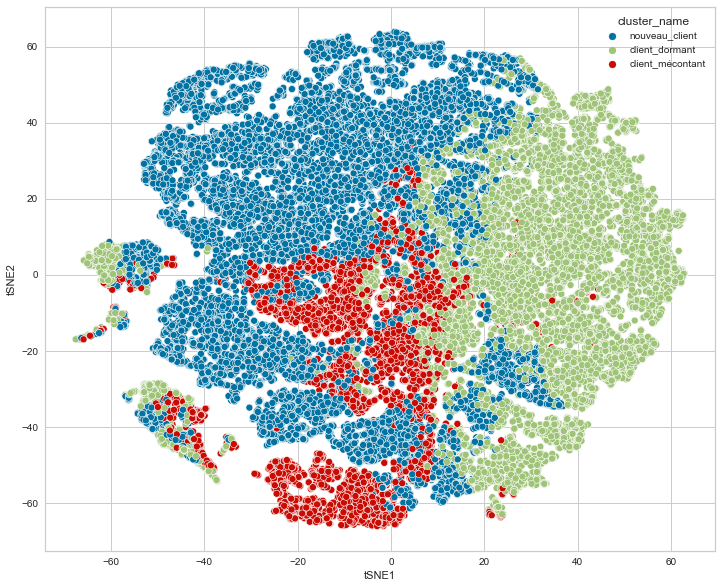

In [161]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster_name",data=X50perc_tsne)

In [43]:
# df_description_3clskmeans = pd.read_excel('C:/Users/piari/Documents/Projet4_ecommerce/Description_3clusters_kmeans.xlsx')
#  3clusters_kmeans_rfm
df_description_3clskmeans = pd.read_excel('C:/Users/piari/Documents/Projet4_ecommerce/Description_3clusters_kmeans.xlsx')

In [44]:
df_description_3clskmeans

Charactéristique             client_dormant  \
0                           Récence  ancient client, "dormant"   
1                         Fréquence                          1   
2  Montant (valeur du panier moyen)                      petit   
3          Montant (Fraits de port)                        bas   
4               Etalage de payement         payement en 2 fois   
5       Volume des produits achetés                     petite   
6                         Livraison               assez rapide   
7                      Satisfaction               très contant   

       nouveau_client    client_mécontant  
0      nouveau client       client recent  
1                   1                   1  
2               petit               moyen  
3                 bas              elévés  
4  payement en 1 fois  payement en 3 fois  
5              petite             moyenne  
6         très rapide  longue et retardée  
7        très contant           mécontant

In [45]:
X.columns

Index(['purchase_number', 'delta_date_order_first', 'delta_date_order_last',
       'freight_value_max', 'review_score_min', 'delivery_period_max',
       'product_volume_cm3_most_frequent', 'intime_delivery_mean',
       'payment_sequential_mean', 'payment_installments_mean',
       'customer_seller_distance_mean', 'purchase_frequency_',
       'average_consumer_basket_'],
      dtype='object')

# Classification ascendante hiérarchique (CAH) <a class="anchor" id="cah"></a>

In [46]:
kmeans_preproc = KMeans(n_clusters=1000, max_iter=1000)
estimator_preproc = make_pipeline(StandardScaler(), kmeans_preproc).fit(X)
cluster_centers1000 = kmeans_preproc.cluster_centers_

In [47]:
cluster_centers1000

array([[-0.16424541,  0.30857859,  0.32802407, ..., -0.91165464,
        -0.10818022, -0.20411813],
       [-0.16424541,  0.40267035,  0.42244789, ...,  0.41179722,
        -0.10818022, -0.10816053],
       [ 4.44658021,  0.24672958, -1.03760361, ..., -0.3842319 ,
         8.05395899, -0.06738387],
       ...,
       [-0.16424541, -1.06075554, -1.04614269, ...,  0.09966113,
        -0.10818022,  0.14064528],
       [-0.16424541,  0.67081446,  0.69153833, ...,  2.30363334,
        -0.10818022, -0.033583  ],
       [-0.16424541, -1.05499114, -1.04035794, ...,  1.81050951,
        -0.10818022,  0.17248568]])

In [48]:
clustering_hca = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
estimator_hca = make_pipeline(StandardScaler(), clustering_hca).fit(cluster_centers1000)

In [49]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

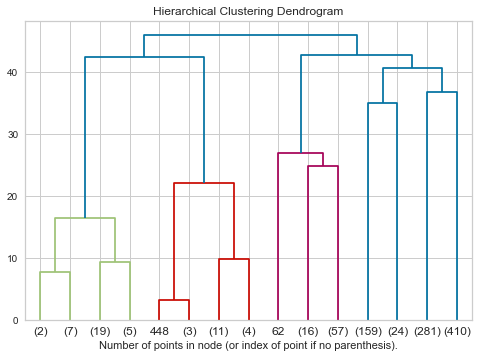

In [50]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(estimator_hca[1], truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [51]:
estimator_hca[1].n_clusters_

1000

In [129]:
sklearn.__version__

'0.23.2'

In [136]:
!pip install --upgrade --user scikit-learn

  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)


In [131]:
pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [132]:
conda install -c conda-forge scikit-learn 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
Note: you may need to restart the kernel to use updated packages.





==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be UPDATED:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.10.1-py38haa244fe_0




conda-4.10.1         | 3.1 MB    |            |   0% 
conda-4.10.1         | 3.1 MB    |            |   1% 
conda-4.10.1         | 3.1 MB    | ########## | 100% 
conda-4.10.1         | 3.1 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... failed


In [52]:
# clustering = AgglomerativeClustering().fit(X)

df_res_clustering_hca = pd.DataFrame(columns=['n_clusters', 'silhouette_score', 'davies_bouldin_score'])
# pca2 = PCA(n_components=2)

for k in range(2, 10):
    clustering_hca = AgglomerativeClustering(n_clusters=k)
    estimator_hca_k = clustering_hca.fit(cluster_centers1000)
    labels_k = clustering_hca.labels_
    #print(data["clusters"])
#     dist = clustering_hca.distances_ # 
    labels_forX = pd.Series([clustering_hca.labels_[idx] for idx in kmeans_preproc.labels_])
    db_score = davies_bouldin_score(X, labels_forX)
    silh_score = metrics.silhouette_score(X, labels_forX, metric='euclidean')
    df_res_clustering_hca = df_res_clustering_hca.append({'n_clusters':k, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
    
df_res_clustering_hca = df_res_clustering_hca.set_index('n_clusters')

In [226]:
kmeans_preproc.labels_

array([854, 119, 219, ..., 403, 145, 175])

In [53]:
df_res_clustering_hca

silhouette_score  davies_bouldin_score
n_clusters                                        
2.0                 0.992544              0.005195
3.0                 0.936523              0.361090
4.0                -0.081771              5.361821
5.0                -0.081967              6.926713
6.0                -0.201476              5.947567
7.0                -0.202030              5.330091
8.0                -0.201920              4.696208
9.0                -0.216418              4.539042

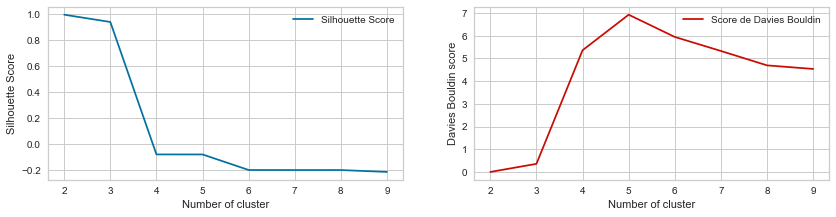

In [54]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(221)
plt.plot(df_res_clustering_hca['silhouette_score'],'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
fig.add_subplot(222)
plt.plot(df_res_clustering_hca['davies_bouldin_score'],'r-',label='Score de Davies Bouldin')
plt.xlabel("Number of cluster")
plt.ylabel("Davies Bouldin score")
plt.legend()

plt.show()

In [55]:
X_clusterhca = X.copy()

In [56]:
# X_clusterhca['labels_hca'] = pd.Series([clustering_hca.labels_[idx] for idx in kmeans_preproc.labels_])


In [57]:
X_clusterhca

purchase_number  delta_date_order_first  delta_date_order_last  \
0                    1              160.273507             160.273507   
1                    1              163.263090             163.263090   
2                    1              585.850868             585.850868   
3                    1              369.875428             369.875428   
4                    1              336.905972             336.905972   
...                ...                     ...                    ...   
93337                1              495.853958             495.853958   
93338                1              310.890532             310.890532   
93339                1              617.070162             617.070162   
93340                1              168.092095             168.092095   
93341                1              532.883021             532.883021   

       freight_value_max  review_score_min  delivery_period_max  \
0                  12.00                 5             6.411227   
1                   8.29                 4             3.285590   
2                  17.22                 3            25.731759   
3                  17.63                 4            20.037083   
4                  16.89                 5            13.141134   
...                  ...               ...                  ...   
93337             258.28                 5            27.514861   
93338              19.69                 4            30.097500   
93339              22.56                 5            14.872083   
93340              18.69                 5            11.858854   
93341              14.57                 5             7.552118   

       product_volume_cm3_most_frequent  intime_delivery_mean  \
0                              0.007616              4.132905   
1                              0.005148              4.248125   
2                              0.043750              1.389734   
3                              0.001045             11.108970   
4                              0.000528              7.035463   
...                                 ...                   ...   
93337                          0.251625             26.609722   
93338                          0.032076              2.063657   
93339                          0.003315             29.468704   
93340                          0.004480             13.503866   
93341                          0.002178             15.601528   

       payment_sequential_mean  payment_installments_mean  \
0                          1.0                        8.0   
1                          1.0                        1.0   
2                          1.0                        8.0   
3                          1.0                        4.0   
4                          1.0                        6.0   
...                        ...                        ...   
93337                      1.0                       10.0   
93338                      1.0                        1.0   
93339                      1.0                        1.0   
93340                      1.0                        5.0   
93341                      1.0                        4.0   

       customer_seller_distance_mean  purchase_frequency_  \
0                         110.563617                  0.0   
1                          22.196745                  0.0   
2                         517.142795                  0.0   
3                        2481.780978                  0.0   
4                         154.488004                  0.0   
...                              ...                  ...   
93337                    1996.471764                  0.0   
93338                    1527.364045                  0.0   
93339                    1526.037981                  0.0   
93340                     637.625592                  0.0   
93341                     356.940689                  0.0   

       average_consumer_basket_  
0                        141.90  
1         

In [116]:
X_clusterhca_scaled = X_scaled.copy()

## Clustering HCA en 3 clusters

In [58]:
clustering_hca3 = AgglomerativeClustering(n_clusters=3)
estimator_hca3 = clustering_hca3.fit_predict(cluster_centers1000)

In [59]:
labels_hca3 = clustering_hca3.labels_

In [60]:
X_clusterhca['labels_hca3'] = pd.Series([clustering_hca3.labels_[idx] for idx in kmeans_preproc.labels_])

In [61]:
len(labels_hca3)

1000

In [63]:
len(cluster_centers1000[0])

13

In [64]:
X_clusterhca['labels_hca3'].unique()

array([0, 2, 1], dtype=int64)

## Visualization de 3 clusters HCA obtenus <a class="anchor" id="hca3_best_viz"></a>

In [66]:
len(X_clusterhca.index)

93342

In [117]:
pca_X = pd.DataFrame(PCA(n_components=2).fit_transform(X_scaled),columns=['PC1','PC2'])
pca_X['labels_hca3'] = X_clusterhca['labels_hca3']
# sns.scatterplot(x="PC1",y="PC2",hue="labels_hca3",data=X)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

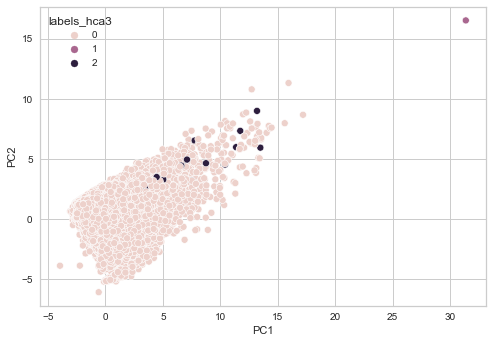

In [118]:
sns.scatterplot(x="PC1",y="PC2",hue="labels_hca3",data=pca_X)

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

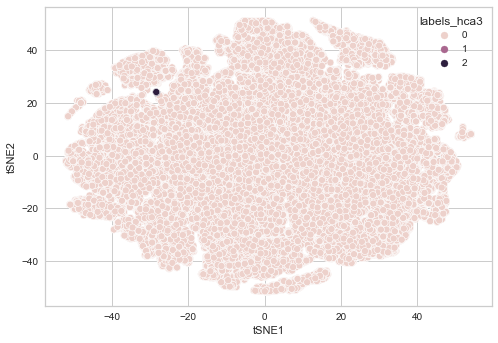

In [110]:
# affichage tSNE
tsne_affichage_hca = TSNE(n_components=2)
X_tsne = pd.DataFrame(tsne_affichage_hca.fit_transform(X_scaled),columns=['tSNE1','tSNE2'])
X_tsne['labels_hca3'] = X_clusterhca['labels_hca3']
sns.scatterplot(x="tSNE1",y="tSNE2",hue="labels_hca3",data=X_tsne)

## Clustering HCA en 4 clusters

In [70]:
clustering_hca4 = AgglomerativeClustering(n_clusters=4)
estimator_hca4 = clustering_hca4.fit_predict(cluster_centers1000)
labels_hca4 = clustering_hca4.labels_

In [71]:
X_clusterhca['labels_hca4'] = pd.Series([clustering_hca4.labels_[idx] for idx in kmeans_preproc.labels_])

In [72]:
X_clusterhca4 = X_clusterhca.drop(['labels_hca3'], axis=1).copy()

## Visualization de 4 clusters HCA obtenus <a class="anchor" id="hca4_best_viz"></a>

In [120]:
pca_X['labels_hca4'] = X_clusterhca4['labels_hca4']

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

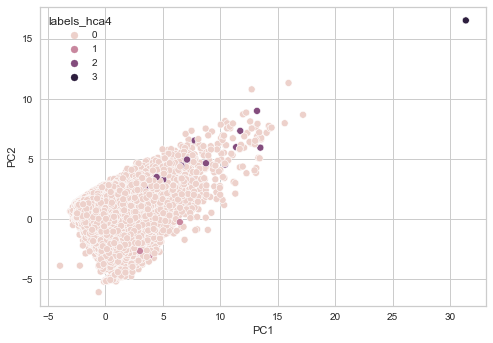

In [121]:
sns.scatterplot(x="PC1",y="PC2",hue="labels_hca4",data=pca_X)

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

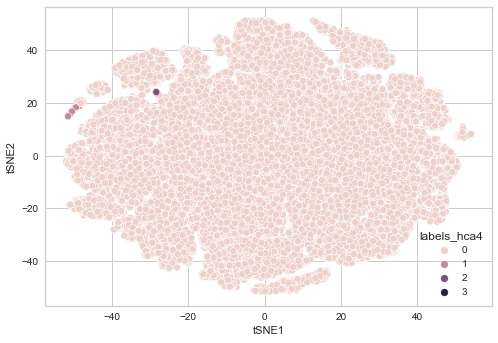

In [122]:
# affichage tSNE
X_tsne['labels_hca4'] = X_clusterhca4['labels_hca4']
sns.scatterplot(x="tSNE1",y="tSNE2",hue="labels_hca4",data=X_tsne)

## Analyse des 4 clusters obtenus <a class="anchor" id="hca4_analysis"></a>

In [76]:
X_clusterhca4[X_clusterhca4['labels_hca4'] == 3]

purchase_number  delta_date_order_first  delta_date_order_last  \
3723                1              383.087106             383.087106   

      freight_value_max  review_score_min  delivery_period_max  \
3723              28.01                 1            18.123345   

      product_volume_cm3_most_frequent  intime_delivery_mean  \
3723                          0.004096              5.234387   

      payment_sequential_mean  payment_installments_mean  \
3723                      1.0                        1.0   

      customer_seller_distance_mean  purchase_frequency_  \
3723                     345.461655                  0.0   

      average_consumer_basket_  labels_hca4  
3723                 109312.64            3

<Figure size 576x396 with 0 Axes>

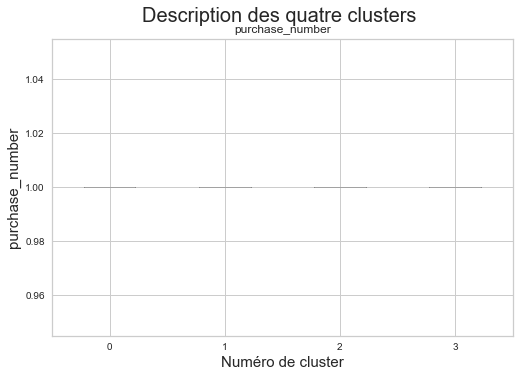

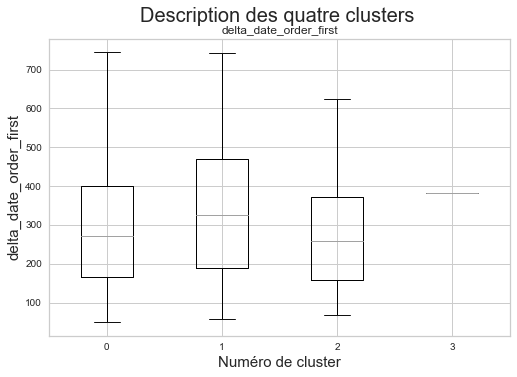

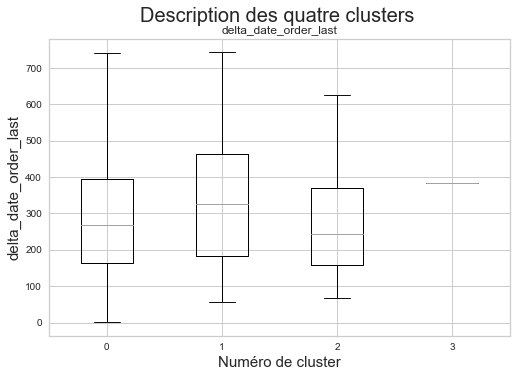

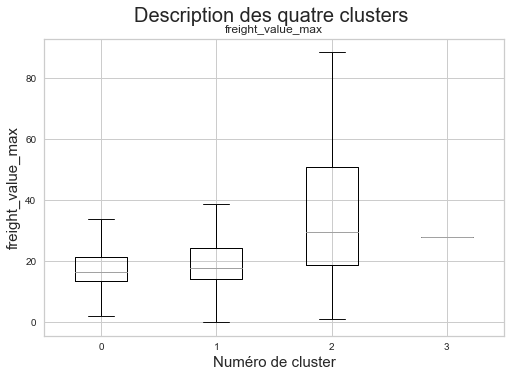

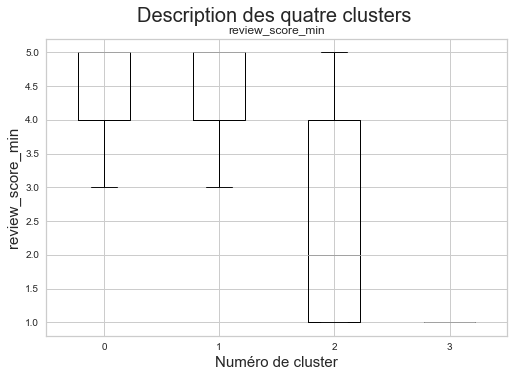

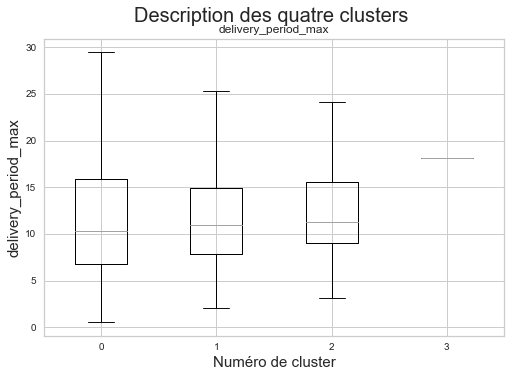

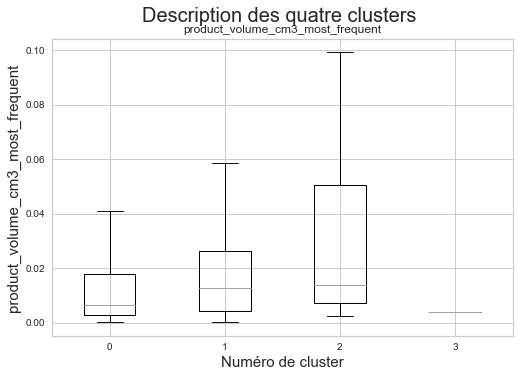

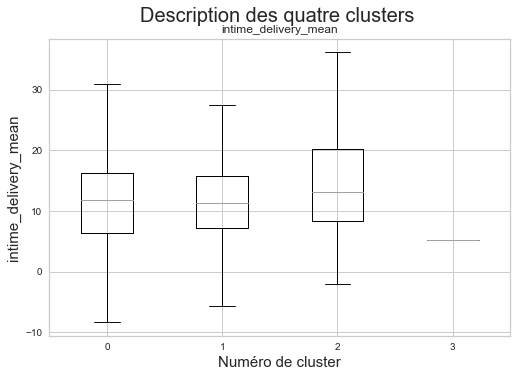

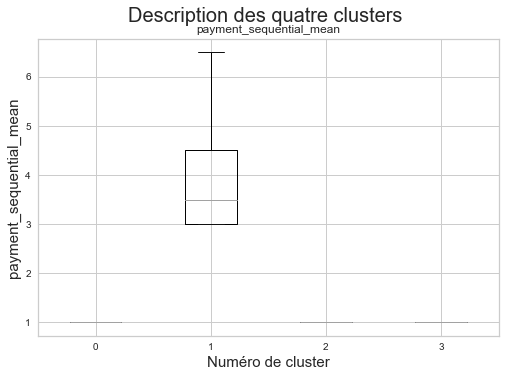

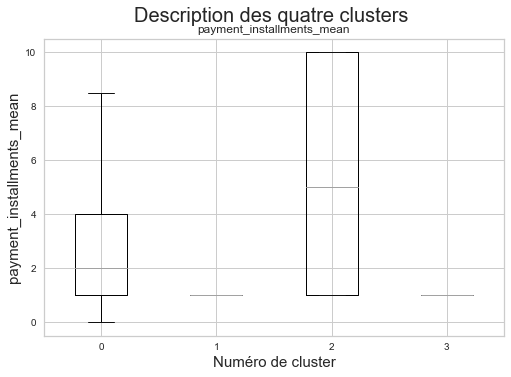

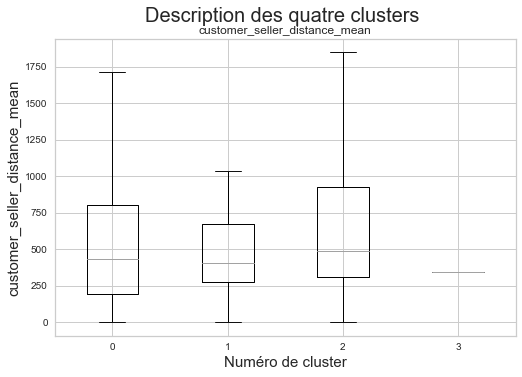

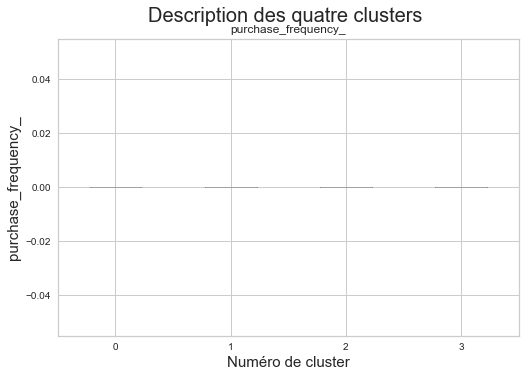

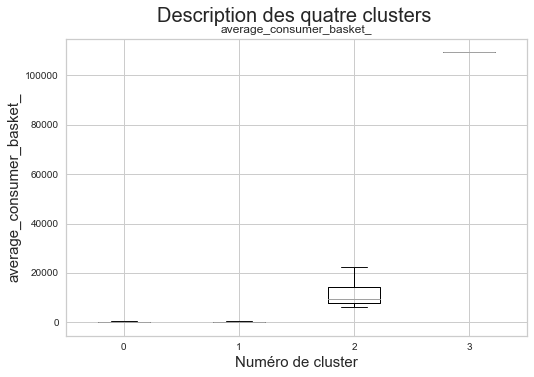

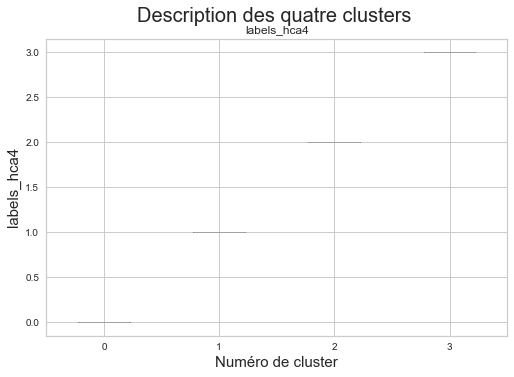

In [77]:
plt.figure()

for col in X_clusterhca4.columns:
    X_clusterhca4.boxplot(column=[col], by= X_clusterhca4['labels_hca4'], showfliers=False)
# plt.title('AAA')
    plt.suptitle('Description des quatre clusters ', fontsize = 20) # 
    plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel(f'{col}', fontsize = 15) # y-axis label with fontsize 15
    plt.show()

# DBSCAN clustering algorithm <a class="anchor" id="dbscan"></a>

## Density-Based Spatial Clustering of Applications with Noise

In [78]:
# A random 10% sample of the DataFrame
# df.sample(frac=0.5, replace=True, random_state=1)
X_10perc_sample = X.sample(frac=0.1, random_state=1)

In [79]:
X_10perc_sample

purchase_number  delta_date_order_first  delta_date_order_last  \
55876                1              160.205162             160.205162   
86488                1              254.724086             254.724086   
78366                1               64.033345              64.033345   
41490                1              320.868669             320.868669   
44306                1               67.164213              67.164213   
...                ...                     ...                    ...   
17340                1              562.005671             562.005671   
77606                1              156.060868             156.060868   
4884                 1              110.112755             110.112755   
47596                1              482.898160             482.898160   
72712                1              379.169410             379.169410   

       freight_value_max  review_score_min  delivery_period_max  \
55876              17.19                 5             8.477847   
86488              13.37                 5             9.895093   
78366              23.54                 5             8.306806   
41490              16.40                 5             6.008727   
44306              38.46                 3            13.472269   
...                  ...               ...                  ...   
17340              17.19                 5            14.804039   
77606               7.72                 5             2.056887   
4884               18.37                 5             6.326991   
47596              23.02                 5             7.810856   
72712              25.49                 4            10.459271   

       product_volume_cm3_most_frequent  intime_delivery_mean  \
55876                          0.002992             15.997940   
86488                          0.027000             21.099618   
78366                          0.024000              6.997164   
41490                          0.003300             21.130567   
44306                          0.008400              3.962569   
...                                 ...                   ...   
17340                          0.001547             14.472257   
77606                          0.004560             11.274606   
4884                           0.003600             19.056389   
47596                          0.001404              4.357928   
72712                          0.002040             33.980764   

       payment_sequential_mean  payment_installments_mean  \
55876                      1.0                        8.0   
86488                      1.0                        4.0   
78366                      1.0                        2.0   
41490                      1.0                        3.0   
44306                      1.5                        1.0   
...                        ...                        ...   
17340                      1.0                        1.0   
77606                      1.0                        1.0   
4884                       1.0                        5.0   
47596                      1.0                        1.0   
72712                      1.5                        2.0   

       customer_seller_distance_mean  purchase_frequency_  \
55876                     646.012358                  0.0   
86488                     201.608031                  0.0   
78366                     816.408945                  0.0   
41490                     153.771483                  0.0   
44306                    1194.502052                  0.0   
...                              ...                  ...   
17340                     214.151313                  0.0   
77606                      37.919699                  0.0   
4884                      659.399874                  0.0   
47596                      78.542928                  0.0   
72712                    2699.927678                  0.0   

       average_consumer_basket_  
55876                    162.19  
86488     

In [111]:
std_scale_X_10perc_sample = preprocessing.StandardScaler().fit(X_10perc_sample)
X_10perc_sample_scaled = std_scale_X_10perc_sample.transform(X_10perc_sample)

If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998) 
https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd


In [133]:
neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(X_10perc_sample_scaled)
distances, indices = neighbors_fit.kneighbors(X_10perc_sample_scaled)

In [134]:
distances

array([[0.        , 0.56767324, 0.64654957, ..., 0.86476583, 0.88413588,
        0.88739682],
       [0.        , 0.62131705, 0.72464598, ..., 0.98378612, 0.99614079,
        1.00331565],
       [0.        , 0.51713439, 0.55345371, ..., 0.78605264, 0.79225698,
        0.79383348],
       ...,
       [0.        , 0.26936021, 0.40793974, ..., 0.75800435, 0.79283431,
        0.79395813],
       [0.        , 0.84698376, 0.89323514, ..., 1.106154  , 1.10839061,
        1.11076679],
       [0.        , 1.98878612, 2.42571607, ..., 3.37980888, 3.43038123,
        3.45476765]])

In [135]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [136]:
distances

array([8.65213038e-03, 8.65213038e-03, 4.19920498e-02, ...,
       7.78002914e+00, 1.61197174e+01, 2.39711410e+01])

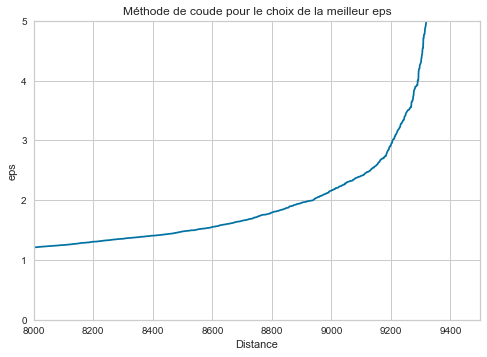

In [142]:
# plot
plt.plot(distances)
# plt.xlim([8300, 9500])
# plt.ylim([45, 300])
plt.xlim([8000, 9500])
plt.ylim([0, 5])
plt.xlabel('Distance')
plt.ylabel('eps')
plt.title('Méthode de coude pour le choix de la meilleur eps')
plt.show()

In [145]:
df_res_clustering_dbscan = pd.DataFrame(columns=['min_samples', 'eps', 'n_clusters', 'silhouette_score', 'davies_bouldin_score'])
# pca2 = PCA(n_components=2)
# eps > 23 crée que 1 cluster
eps = [0.55, 0.6, 0.65, 0.85, 0.9, 1, 1.75, 2, 2.5, 3]
min_samples = [21, 22, 23, 24, 25, 26, 27, 28]
# eps = [0.35, 0.45, 0.5, 0.6, 0.7, 0.75, 0.95]
# min_samples = [12, 13, 14, 15, 16, 17, 18, 19, 20]


for e in eps:
    for ms in min_samples:
        clustering_dbscan = DBSCAN(eps=e, min_samples=ms)
        estimator_dbscan = make_pipeline(StandardScaler(), clustering_dbscan).fit(X_10perc_sample)
        labels_dbscan = clustering_dbscan.labels_
        print('e=', e, 'ms=', ms)
#         k - le nombre de clusters
        k = pd.Series(labels_dbscan).nunique()
        labels_list = list(pd.Series(labels_dbscan).unique())
#         si il y a des clusters avec un label "-1", on ne les comptes pas
        labels_list.sort()
        k += labels_list[0]
#         print("nombre d'étiquettes : ", len(labels_k))
        # calcul des scores
        db_score = davies_bouldin_score(X_10perc_sample, labels_dbscan)
        silh_score = metrics.silhouette_score(X_10perc_sample, labels_dbscan, metric='euclidean')   
        df_res_clustering_dbscan = df_res_clustering_dbscan.append({'min_samples':ms,'eps':e, 'n_clusters':k,
                                                                    'silhouette_score':silh_score,
                                              'davies_bouldin_score':db_score}, ignore_index=True)
        
    
df_res_clustering_dbscan = df_res_clustering_dbscan.set_index('eps')

e= 0.55 ms= 21
e= 0.55 ms= 22
e= 0.55 ms= 23
e= 0.55 ms= 24
e= 0.55 ms= 25
e= 0.55 ms= 26
e= 0.55 ms= 27
e= 0.55 ms= 28
e= 0.6 ms= 21
e= 0.6 ms= 22
e= 0.6 ms= 23
e= 0.6 ms= 24
e= 0.6 ms= 25
e= 0.6 ms= 26
e= 0.6 ms= 27
e= 0.6 ms= 28
e= 0.65 ms= 21
e= 0.65 ms= 22
e= 0.65 ms= 23
e= 0.65 ms= 24
e= 0.65 ms= 25
e= 0.65 ms= 26
e= 0.65 ms= 27
e= 0.65 ms= 28
e= 0.85 ms= 21
e= 0.85 ms= 22
e= 0.85 ms= 23
e= 0.85 ms= 24
e= 0.85 ms= 25
e= 0.85 ms= 26
e= 0.85 ms= 27
e= 0.85 ms= 28
e= 0.9 ms= 21
e= 0.9 ms= 22
e= 0.9 ms= 23
e= 0.9 ms= 24
e= 0.9 ms= 25
e= 0.9 ms= 26
e= 0.9 ms= 27
e= 0.9 ms= 28
e= 1 ms= 21
e= 1 ms= 22
e= 1 ms= 23
e= 1 ms= 24
e= 1 ms= 25
e= 1 ms= 26
e= 1 ms= 27
e= 1 ms= 28
e= 1.75 ms= 21
e= 1.75 ms= 22
e= 1.75 ms= 23
e= 1.75 ms= 24
e= 1.75 ms= 25
e= 1.75 ms= 26
e= 1.75 ms= 27
e= 1.75 ms= 28
e= 2 ms= 21
e= 2 ms= 22
e= 2 ms= 23
e= 2 ms= 24
e= 2 ms= 25
e= 2 ms= 26
e= 2 ms= 27
e= 2 ms= 28
e= 2.5 ms= 21
e= 2.5 ms= 22
e= 2.5 ms= 23
e= 2.5 ms= 24
e= 2.5 ms= 25
e= 2.5 ms= 26
e= 2.5 ms= 27
e= 2.5

In [86]:
list(pd.Series(labels_dbscan).unique())

[0, -1, 1]

In [146]:
df_res_clustering_dbscan[df_res_clustering_dbscan['n_clusters'] <= 2]

min_samples  n_clusters  silhouette_score  davies_bouldin_score
eps                                                                  
0.55         22.0         2.0         -0.255550              1.830807
0.55         25.0         2.0         -0.257243              1.800178
0.55         26.0         2.0         -0.254680              1.779022
0.55         27.0         1.0         -0.142068              1.905009
0.55         28.0         1.0         -0.142751              1.880735
0.60         27.0         2.0         -0.257726              1.890421
0.60         28.0         2.0         -0.258473              1.888765
0.65         21.0         2.0         -0.219701              5.150986
0.65         22.0         2.0         -0.220009              4.953040
0.65         23.0         2.0         -0.220752              4.909027
0.85         23.0         2.0         -0.285891              8.851064
0.85         24.0         2.0         -0.286620              8.731214
0.85         25.0         1.0          0.047664              2.283723
0.85         26.0         1.0          0.044665              2.293352
0.85         27.0         1.0          0.042964              2.288510
0.85         28.0         1.0          0.040214              2.283000
0.90         25.0         2.0         -0.260332              5.034965
0.90         26.0         2.0         -0.266927              5.291889
0.90         27.0         2.0         -0.277160              6.829136
0.90         28.0         1.0          0.074169              2.277859
1.00         21.0         1.0          0.192597              2.064438
1.00         22.0         1.0          0.188944              2.068381
1.75         26.0         2.0         -0.155408              5.220086
1.75         27.0         2.0         -0.154430              5.264661
1.75         28.0         2.0         -0.156377              5.225277

min_samples :  21
sil_norm eps
0.55    0.148851
0.60    0.000000
0.65    0.380623
0.85    0.283078
0.90    0.196100
1.00    1.000000
1.75    0.408050
2.00    0.391991
2.50    0.477835
3.00    0.469227
Name: sil_norm, dtype: float64
boul_norm eps
0.55    1.000000
0.60    0.973920
0.65    0.822805
0.85    0.932839
0.90    0.890788
1.00    0.980817
1.75    0.606169
2.00    0.689938
2.50    0.000000
3.00    0.083442
Name: boul_norm, dtype: float64
max eps
0.55    0.574425
0.60    0.486960
0.65    0.601714
0.85    0.607958
0.90    0.543444
1.00    0.990408
1.75    0.507109
2.00    0.540964
2.50    0.238917
3.00    0.276334
Name: max, dtype: float64
best_score 0.9904083374714756
--------------------------
x :  Float64Index([1.0], dtype='float64', name='eps')


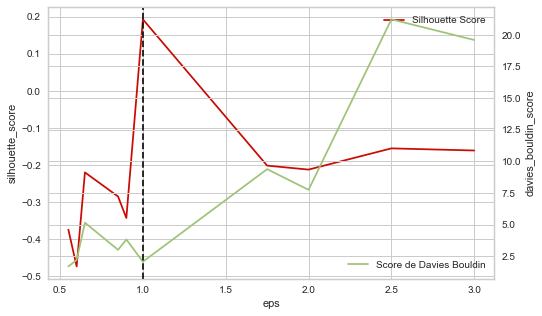

min_samples :  22
sil_norm eps
0.55    0.332514
0.60    0.000000
0.65    0.385886
0.85    0.194930
0.90    0.180432
1.00    1.000000
1.75    0.412479
2.00    0.398362
2.50    0.484056
3.00    0.481591
Name: sil_norm, dtype: float64
boul_norm eps
0.55    1.000000
0.60    0.980777
0.65    0.834916
0.85    0.726836
0.90    0.900587
1.00    0.987439
1.75    0.683810
2.00    0.693009
2.50    0.000000
3.00    0.011244
Name: boul_norm, dtype: float64
max eps
0.55    0.666257
0.60    0.490388
0.65    0.610401
0.85    0.460883
0.90    0.540509
1.00    0.993719
1.75    0.548144
2.00    0.545686
2.50    0.242028
3.00    0.246418
Name: max, dtype: float64
best_score 0.9937192822937655
--------------------------
x :  Float64Index([1.0], dtype='float64', name='eps')


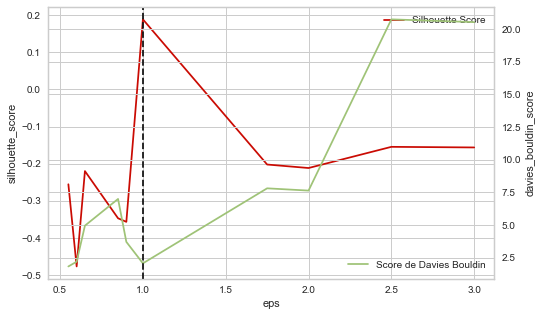

min_samples :  23
sil_norm eps
0.55    0.000000
0.60    0.029077
0.65    0.766319
0.85    0.565101
0.90    0.611834
1.00    0.726972
1.75    0.650552
2.00    0.793359
2.50    0.971288
3.00    1.000000
Name: sil_norm, dtype: float64
boul_norm eps
0.55    0.967907
0.60    1.000000
0.65    0.847108
0.85    0.639948
0.90    0.962251
1.00    0.855705
1.75    0.795470
2.00    0.722962
2.50    0.006939
3.00    0.000000
Name: boul_norm, dtype: float64
max eps
0.55    0.483953
0.60    0.514539
0.65    0.806713
0.85    0.602525
0.90    0.787042
1.00    0.791339
1.75    0.723011
2.00    0.758160
2.50    0.489113
3.00    0.500000
Name: max, dtype: float64
best_score 0.8067134681444982
--------------------------
x :  Float64Index([0.65], dtype='float64', name='eps')


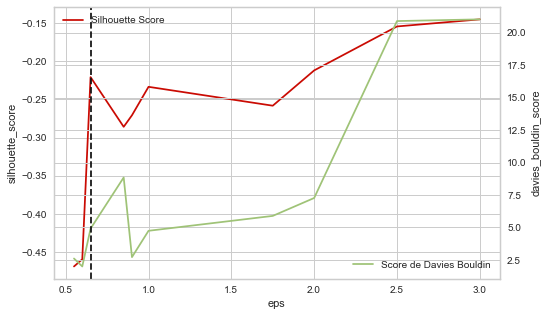

min_samples :  24
sil_norm eps
0.55    0.000000
0.60    0.331304
0.65    0.574858
0.85    0.562668
0.90    0.573522
1.00    0.714352
1.75    0.650900
2.00    0.793226
2.50    0.970245
3.00    1.000000
Name: sil_norm, dtype: float64
boul_norm eps
0.55    0.956980
0.60    1.000000
0.65    0.859611
0.85    0.642344
0.90    0.942124
1.00    0.863390
1.75    0.797945
2.00    0.716700
2.50    0.016801
3.00    0.000000
Name: boul_norm, dtype: float64
max eps
0.55    0.478490
0.60    0.665652
0.65    0.717235
0.85    0.602506
0.90    0.757823
1.00    0.788871
1.75    0.724423
2.00    0.754963
2.50    0.493523
3.00    0.500000
Name: max, dtype: float64
best_score 0.7888710097748954
min_samples : 24
--------------------------
x :  Float64Index([1.0], dtype='float64', name='eps')


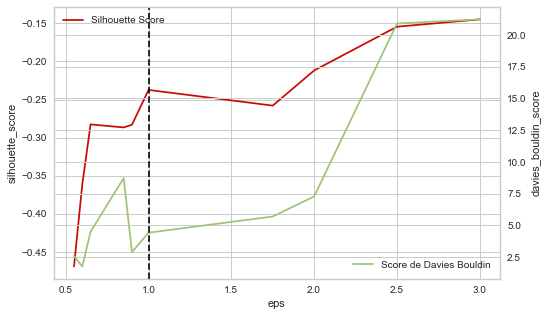

min_samples :  25
sil_norm eps
0.55    0.308907
0.60    0.065357
0.65    0.000000
0.85    1.000000
0.90    0.301906
1.00    0.344432
1.75    0.268104
2.00    0.327423
2.50    0.542958
3.00    0.563890
Name: sil_norm, dtype: float64
boul_norm eps
0.55    0.999844
0.60    1.000000
0.65    0.968464
0.85    0.974952
0.90    0.833326
1.00    0.876220
1.75    0.766299
2.00    0.769575
2.50    0.008772
3.00    0.000000
Name: boul_norm, dtype: float64
max eps
0.55    0.654375
0.60    0.532678
0.65    0.484232
0.85    0.987476
0.90    0.567616
1.00    0.610326
1.75    0.517201
2.00    0.548499
2.50    0.275865
3.00    0.281945
Name: max, dtype: float64
best_score 0.9874761900939356
--------------------------
x :  Float64Index([0.85], dtype='float64', name='eps')


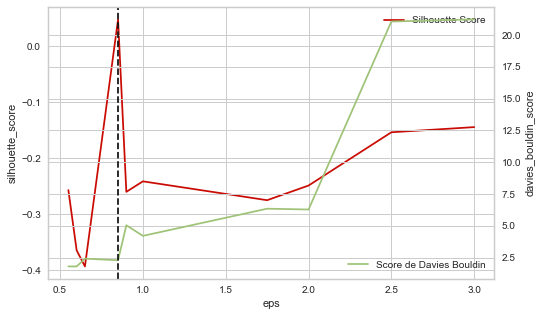

min_samples :  26
sil_norm eps
0.55    0.408762
0.60    0.336572
0.65    0.000000
0.85    1.000000
0.90    0.384574
1.00    0.220873
1.75    0.604834
2.00    0.497526
2.50    0.607756
3.00    0.626545
Name: sil_norm, dtype: float64
boul_norm eps
0.55    0.999305
0.60    1.000000
0.65    0.979944
0.85    0.973151
0.90    0.820676
1.00    0.901144
1.75    0.824327
2.00    0.716358
2.50    0.000000
3.00    0.012213
Name: boul_norm, dtype: float64
max eps
0.55    0.704034
0.60    0.668286
0.65    0.489972
0.85    0.986576
0.90    0.602625
1.00    0.561008
1.75    0.714581
2.00    0.606942
2.50    0.303878
3.00    0.319379
Name: max, dtype: float64
best_score 0.9865757226395182
--------------------------
x :  Float64Index([0.85], dtype='float64', name='eps')


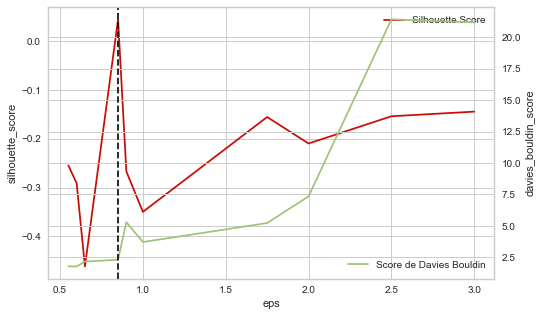

min_samples :  27
sil_norm eps
0.55    0.635988
0.60    0.408455
0.65    0.000000
0.85    1.000000
0.90    0.370224
1.00    0.229426
1.75    0.611669
2.00    0.502733
2.50    0.622916
3.00    0.632327
Name: sil_norm, dtype: float64
boul_norm eps
0.55    0.999258
0.60    1.000000
0.65    0.984097
0.85    0.979741
0.90    0.748670
1.00    0.900031
1.75    0.828286
2.00    0.722477
2.50    0.000000
3.00    0.018497
Name: boul_norm, dtype: float64
max eps
0.55    0.817623
0.60    0.704228
0.65    0.492049
0.85    0.989871
0.90    0.559447
1.00    0.564728
1.75    0.719977
2.00    0.612605
2.50    0.311458
3.00    0.325412
Name: max, dtype: float64
best_score 0.9898706539194041
--------------------------
x :  Float64Index([0.85], dtype='float64', name='eps')


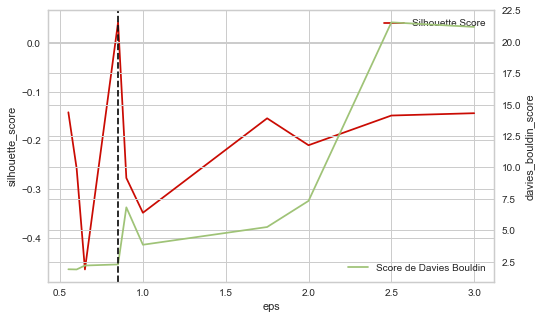

min_samples :  28
sil_norm eps
0.55    0.603406
0.60    0.391831
0.65    0.000000
0.85    0.937921
0.90    1.000000
1.00    0.292040
1.75    0.578494
2.00    0.481806
2.50    0.592422
3.00    0.601391
Name: sil_norm, dtype: float64
boul_norm eps
0.55    1.000000
0.60    0.999592
0.65    0.985096
0.85    0.979546
0.90    0.979808
1.00    0.842629
1.75    0.829943
2.00    0.732407
2.50    0.000000
3.00    0.016195
Name: boul_norm, dtype: float64
max eps
0.55    0.801703
0.60    0.695711
0.65    0.492548
0.85    0.958734
0.90    0.989904
1.00    0.567335
1.75    0.704218
2.00    0.607107
2.50    0.296211
3.00    0.308793
Name: max, dtype: float64
best_score 0.9899038745836043
--------------------------
x :  Float64Index([0.9], dtype='float64', name='eps')


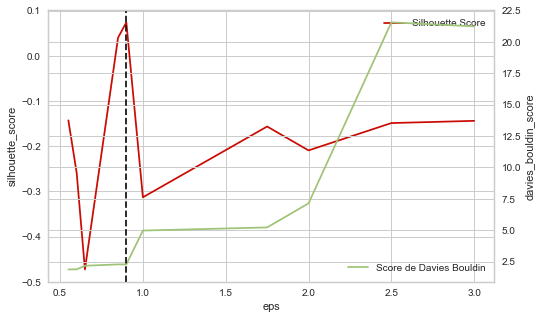

In [147]:
# affichage des résultats sur des graphiques
df_best_dbscan = pd.DataFrame(columns=['min_samples', 'max_norm', 'eps'])

# n_clust = df_res_clustering_dbscan['n_clusters'].unique()


for ms in min_samples:
    print('min_samples : ', ms)
    mini_res = df_res_clustering_dbscan[df_res_clustering_dbscan['min_samples'] == ms].copy()
    mini_res['sil_norm'] = _norm(mini_res, 'silhouette_score')
    print('sil_norm', mini_res['sil_norm'])
    mini_res['boul_norm'] = 1 - _norm(mini_res, 'davies_bouldin_score')
    print('boul_norm', mini_res['boul_norm'])
    mini_res['max'] = mini_res['sil_norm'] * 0.5 +  mini_res['boul_norm'] * 0.5
    print('max', mini_res['max'])
    best_score = mini_res['max'].max()
    print('best_score', best_score)
    eps_courant = (mini_res[mini_res['max'] == best_score].index).array
    
#     
    cluster_list = (mini_res[mini_res['max'] == best_score]['n_clusters']).tolist()
    if len(cluster_list) > 1:
        print(f"{bcolors.WARNING}'Erreur !!! len = {len(cluster_list)}{bcolors.ENDC}")
        break
    
    if cluster_list[0] > 2:
        df_best_dbscan = df_best_dbscan.append({'min_samples':ms, 'max_norm':best_score, 'eps':eps_courant[0]}, ignore_index=True)
    #     print('max de score de silhouette est', max_silhoutte, 'lorsque le nombre de clusters est à ', 
    #           mini_res[mini_res['silhouette_score'] == max_silhoutte].index)
    #     min_bouldin = mini_res['davies_bouldin_score'].min()
    #     print('min de score de davies bouldin est', min_bouldin, 'lorsque le nombre de clusters est à ', 
    #           mini_res[mini_res['davies_bouldin_score'] == min_bouldin].index)
        print('min_samples :', ms)

    fig = plt.figure(figsize=(8,5))

    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    mini_res.plot(ax=ax1, y='silhouette_score', color='r',label='Silhouette Score')
    mini_res.plot(ax=ax2, y='davies_bouldin_score', color='g',label='Score de Davies Bouldin')
    plt.gca().legend(loc=4)
    plt.xlabel("epsilon")
    #     plt.ylabel("Silhouette & Davies Bouldin Scores")
    ax1.set_ylabel('silhouette_score')
    ax2.set_ylabel('davies_bouldin_score')
#     plt.legend(loc='best')
    #     fig.add_subplot(223)
    x = mini_res[mini_res['max'] == best_score].index
    print('--------------------------')
    print('x : ', x)

    if len(x):
        plt.axvline(x, color='k', linestyle='--')


#     plt.ylabel("Davies Bouldin score")
#     plt.legend()

    plt.show()

In [126]:
df_res_clustering_dbscan

min_samples  n_clusters  silhouette_score  davies_bouldin_score
eps                                                                  
0.55         21.0         4.0         -0.373983              1.689718
0.55         22.0         2.0         -0.255550              1.830807
0.55         23.0         4.0         -0.468827              2.610366
0.55         24.0         4.0         -0.469155              2.612281
0.55         25.0         2.0         -0.257243              1.800178
0.55         26.0         2.0         -0.254680              1.779022
0.55         27.0         1.0         -0.142068              1.905009
0.55         28.0         1.0         -0.142751              1.880735
0.60         21.0         6.0         -0.473068              2.199156
0.60         22.0         6.0         -0.476979              2.194373
0.60         23.0         5.0         -0.459414              1.999663
0.60         24.0         4.0         -0.361677              1.775649
0.60         25.0         4.0         -0.364696              1.797145
0.60         26.0         3.0         -0.291230              1.765356
0.60         27.0         2.0         -0.257726              1.890421
0.60         28.0         2.0         -0.258473              1.888765
0.65         21.0         2.0         -0.219701              5.150986
0.65         22.0         2.0         -0.220009              4.953040
0.65         23.0         2.0         -0.220752              4.909027
0.65         24.0         3.0         -0.282666              4.505876
0.65         25.0         4.0         -0.393531              2.409764
0.65         26.0         6.0         -0.461637              2.159779
0.65         27.0         6.0         -0.465349              2.202919
0.65         28.0         6.0         -0.472788              2.173860
0.85         21.0         3.0         -0.284633              3.001617
0.85         22.0         3.0         -0.347170              6.997151
0.85         23.0         2.0         -0.285891              8.851064
0.85         24.0         2.0         -0.286620              8.731214
0.85         25.0         1.0          0.047664              2.283723
0.85         26.0         1.0          0.044665              2.293352
0.85         27.0         1.0          0.042964              2.288510
0.85         28.0         1.0          0.040214              2.283000
0.90         21.0         4.0         -0.342531              3.823026
0.90         22.0         4.0         -0.356825              3.710997
0.90         23.0         3.0         -0.270762              2.717988
0.90         24.0         3.0         -0.283099              2.901197
0.90         25.0         2.0         -0.260332              5.034965
0.90         26.0         2.0         -0.266927              5.291889
0.90         27.0         2.0         -0.277160              6.829136
0.90         28.0         1.0          0.074169              2.277859
1.00         21.0         1.0          0.192597              2.064438
1.00         22.0         1.0          0.188944              2.068381
1.00         23.0         3.0         -0.233489              4.745432
1.00         24.0         3.0         -0.237413              4.432386
1.00         25.0         3.0         -0.241570              4.201704
1.00         26.0         5.0         -0.349809              3.709433
1.00         27.0         5.0         -0.348729              3.854836
1.00         28.0         4.0         -0.313055              4.975768

In [148]:
# best: min_samplees = 24, eps = 0.35
df_best_dbscan.style.highlight_max(subset=['max_norm'], color='#6EA4EC')

In [149]:
df_res_clustering_dbscan[(df_res_clustering_dbscan.index == 1) & (df_res_clustering_dbscan['min_samples'] == 24)]

min_samples  n_clusters  silhouette_score  davies_bouldin_score
eps                                                                 
1.0         24.0         3.0         -0.237413              4.432386

In [150]:
clustering_dbscan = DBSCAN(eps=1, min_samples=24)
estimator_dbscan = make_pipeline(StandardScaler(), clustering_dbscan).fit(X_10perc_sample)
labels_dbscan = clustering_dbscan.labels_
print('nombre de population des clusters : ', pd.Series(labels_dbscan).value_counts())
# calcul des scores
db_score = davies_bouldin_score(X_10perc_sample, labels_dbscan)
silh_score = metrics.silhouette_score(X_10perc_sample, labels_dbscan, metric='euclidean')

nombre de population des clusters :   0    5172
-1    3913
 1     231
 2      18
dtype: int64


In [151]:
print('Score Davis Bouldin : ', db_score, 'Score de silhouette : ', silh_score)

Score Davis Bouldin :  4.432385629393012 Score de silhouette :  -0.23741259216438046


In [152]:
pd.Series(labels_dbscan).nunique()

4

## Visualisation de clusters DBscan obtenus <a class="anchor" id="dbscan_viz"></a>

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

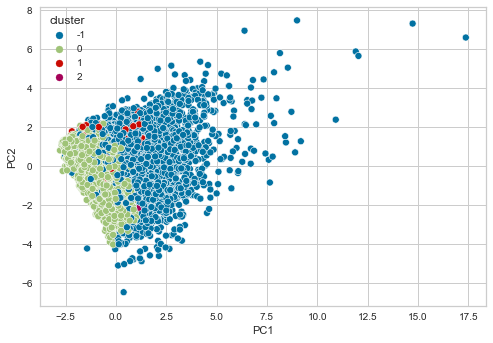

In [153]:
pca_X10perc = pd.DataFrame(PCA(n_components=2).fit_transform(X_10perc_sample_scaled),columns=['PC1','PC2'])
pca_X10perc['cluster'] = pd.Categorical(labels_dbscan)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_X10perc)

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

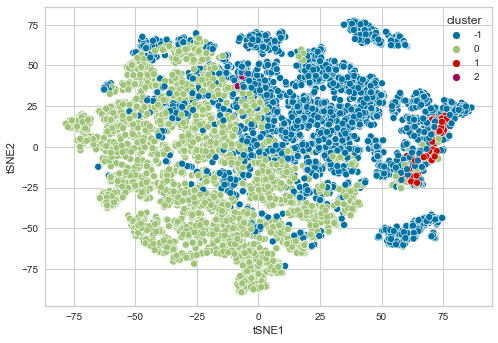

In [154]:
# affichage tSNE
tsne_affichage = TSNE(n_components=2)
X_10perc_tsne = pd.DataFrame(tsne_affichage.fit_transform(X_10perc_sample_scaled),columns=['tSNE1','tSNE2'])
X_10perc_tsne['cluster'] = pd.Categorical(labels_dbscan)
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster",data=X_10perc_tsne)

# Test de RobustScaler <a class="anchor" id="robust_scaler"></a>

In [162]:
robustscale_X_50perc_sample = preprocessing.RobustScaler().fit(X_50perc_sample)
X50perc_robustscaled = robustscale_X_50perc_sample.transform(X_50perc_sample)

In [190]:
pca.fit(X50perc_robustscaled)

PCA(n_components=9)

In [191]:
pcs_rob = pca.components_

(-0.7, 0.7)

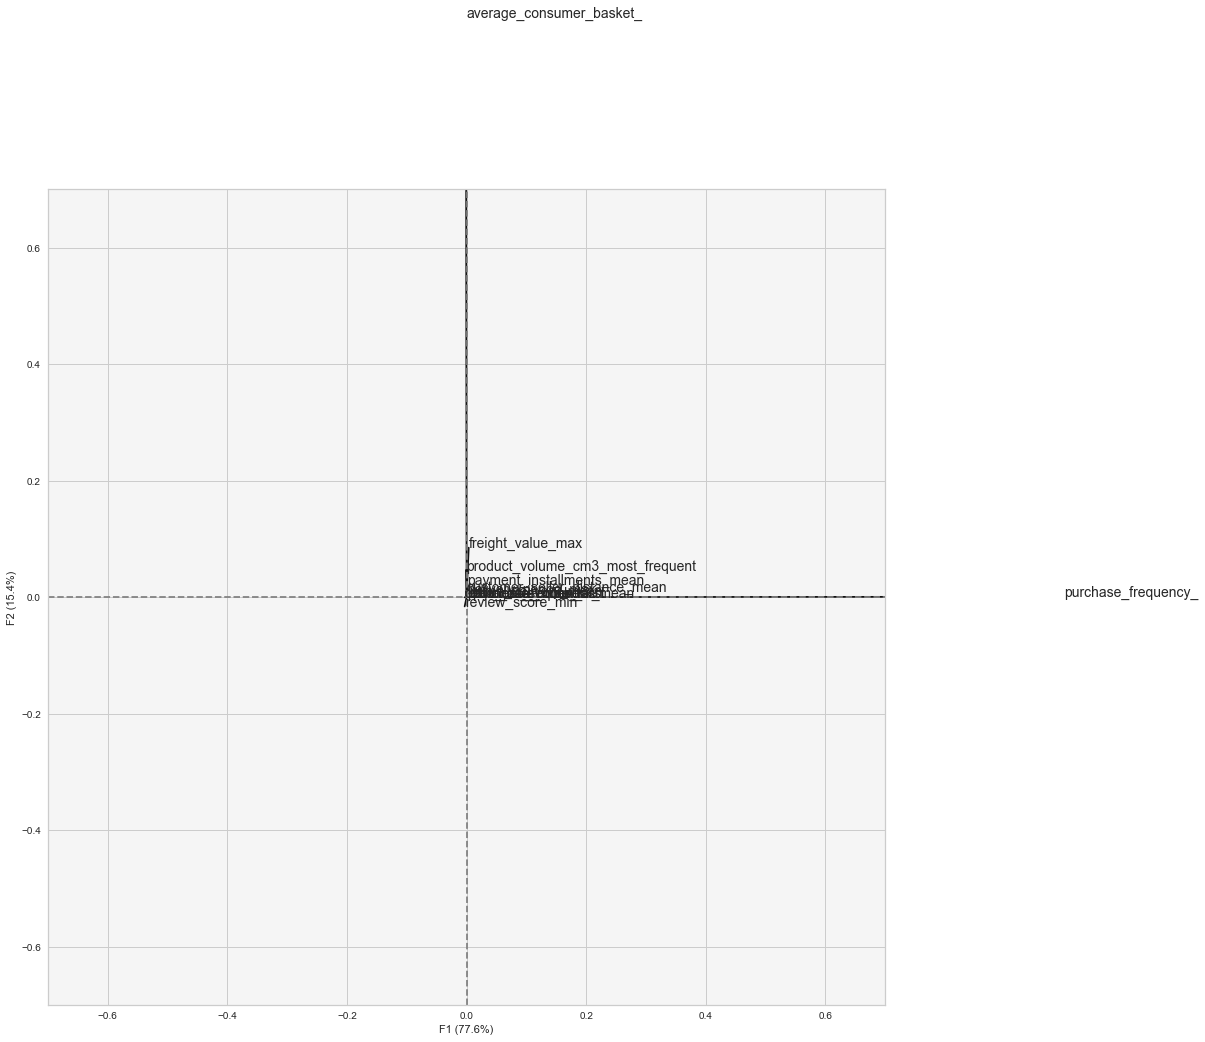

In [192]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs_rob[0, :], pcs_rob[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

    
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [163]:
#RobustScaler(), PCA(n_components=n)

df_res_robust_kmeans = pd.DataFrame(columns=['n_components', 'n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])


for n in range(2,10):
    for k in range(3,10):
        pca = PCA(n_components=n)
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        estimator = make_pipeline(RobustScaler(), pca, kmeans).fit(X_50perc_sample)
        labels_k = kmeans.labels_
        #print(data["clusters"])
        inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center = SSE
        db_score = davies_bouldin_score(X_50perc_sample, labels_k)
        silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
        df_res_robust_kmeans = df_res_robust_kmeans.append({'n_components':n, 'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_robust_kmeans = df_res_robust_kmeans.set_index('n_clusters')

In [219]:
# fonction pour faire des graphiques de résultats pour kmeans

def plotscore_kmeans (df_res_kmeans,n):
    df_best_res = pd.DataFrame(columns=['n_components', 'max_norm', 'k_cluster'])

    for n in range(2,n):
        mini_res = df_res_kmeans[df_res_kmeans['n_components'] == n].copy()
        max_silhoutte = mini_res['silhouette_score'].max()
        mini_res['sil_norm'] = _norm(mini_res, 'silhouette_score')
        mini_res['boul_norm'] = 1 - _norm(mini_res, 'davies_bouldin_score')
        mini_res['max'] = mini_res['sil_norm'] * 0.5 +  mini_res['boul_norm'] * 0.5
        best_score = mini_res['max'].max()
        best_k = (mini_res[mini_res['max'] == best_score].index).array

        df_best_res = df_best_res.append({'n_components':n, 'max_norm':best_score, 'k_cluster':best_k[0]}, ignore_index=True)
    #     print('max de score de silhouette est', max_silhoutte, 'lorsque le nombre de clusters est à ', 
    #           mini_res[mini_res['silhouette_score'] == max_silhoutte].index)
    #     min_bouldin = mini_res['davies_bouldin_score'].min()
    #     print('min de score de davies bouldin est', min_bouldin, 'lorsque le nombre de clusters est à ', 
    #           mini_res[mini_res['davies_bouldin_score'] == min_bouldin].index)
        print('n_components :', n)
        plot_score(mini_res, best_k)
    return df_best_res.style.highlight_max(subset=['max_norm'], color='#6EA4EC')

n_components : 2


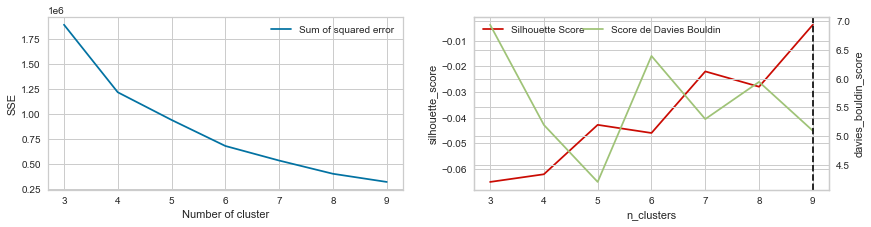

n_components : 3


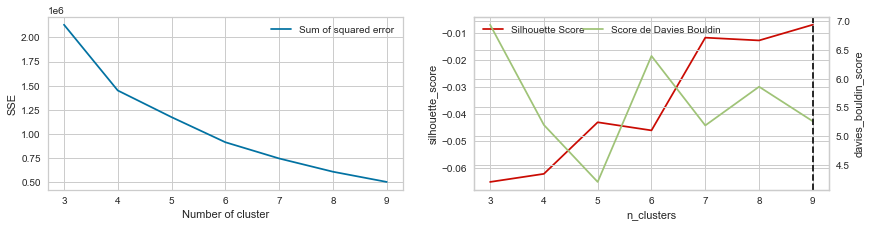

n_components : 4


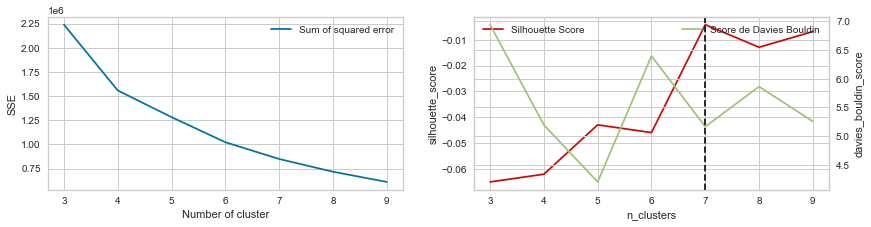

n_components : 5


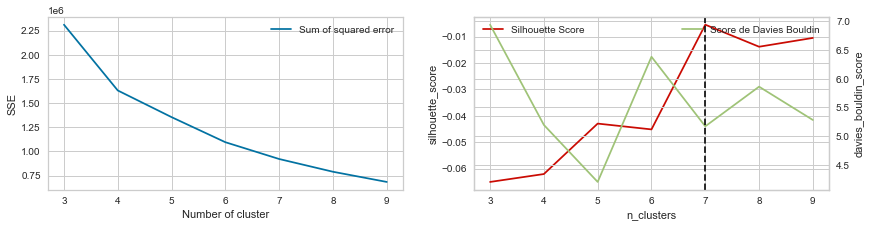

n_components : 6


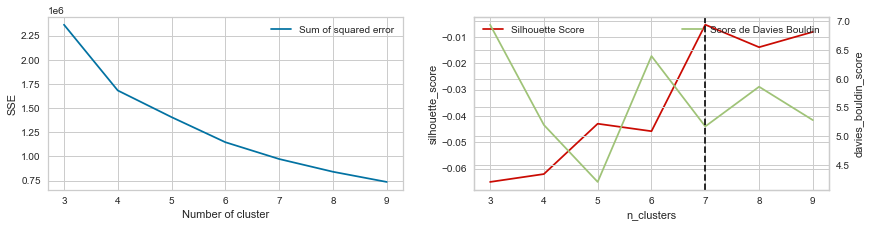

n_components : 7


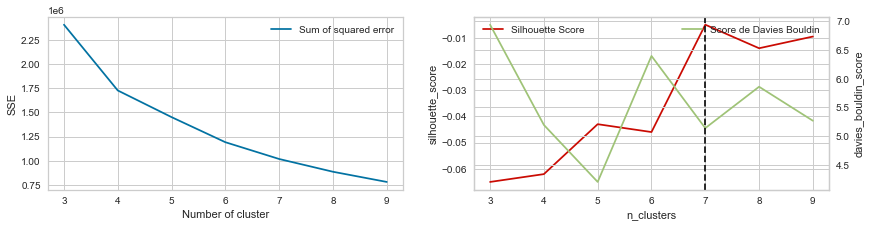

n_components : 8


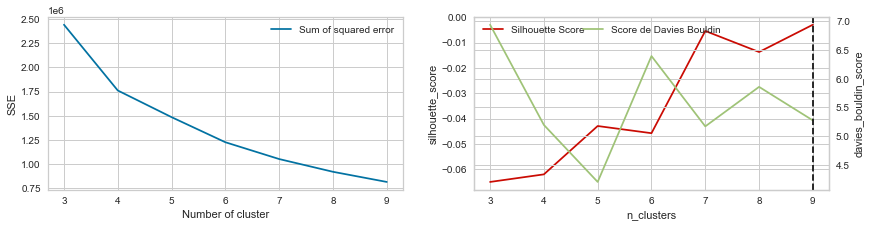

n_components : 9


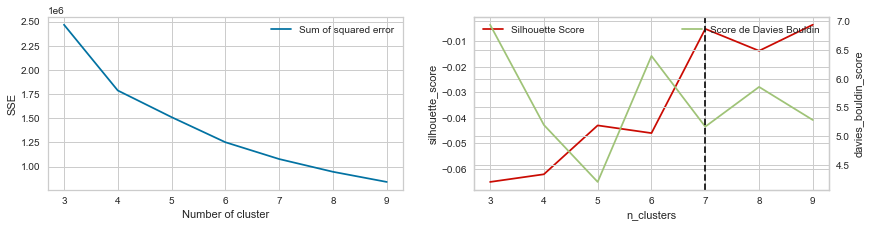

In [172]:
plotscore_kmeans(df_res_robust_kmeans)

For n_clusters = 9 The average silhouette_score is : 0.8207672411428721


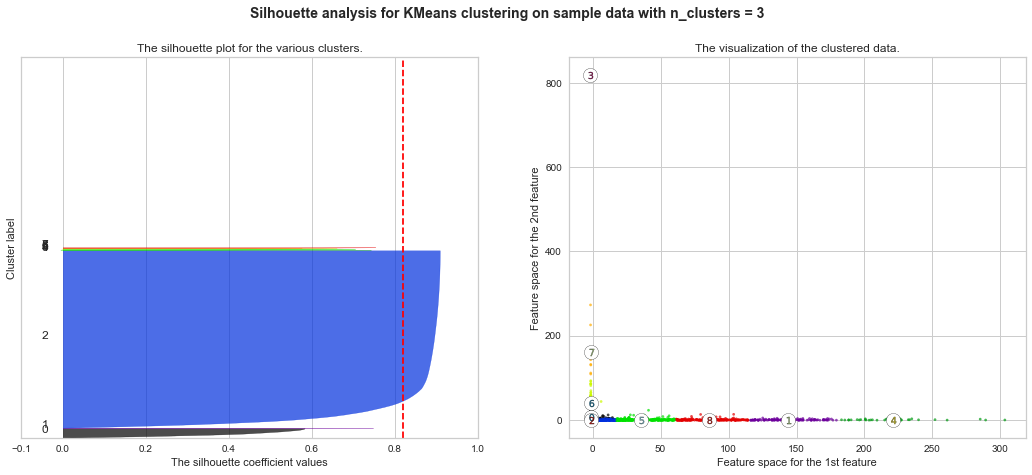

In [174]:
# RobustScaler()
# Create a subplot with 1 row and 2 columns
n_clusters = 9
n_components = 2
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X50perc_robustscaled)
kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(reduced_data)
estimator_RobustScaler = make_pipeline(RobustScaler(), PCA(n_components=n_components), kmeans).fit(X_50perc_sample)
cluster_labels = kmeans.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

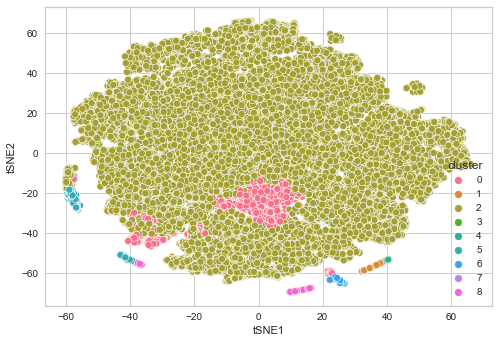

In [175]:
# affichage tSNE
# tsne_affichage = TSNE(n_components=2)
X50perc_robustscaled_tsne = pd.DataFrame(tsne_affichage.fit_transform(X50perc_robustscaled),columns=['tSNE1','tSNE2'])
X50perc_robustscaled_tsne['cluster'] = pd.Categorical(cluster_labels)
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster",data=X50perc_robustscaled_tsne)

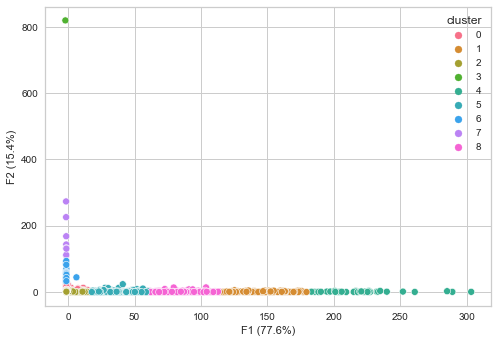

Text(0, 0.5, 'F2 (1.3%)')

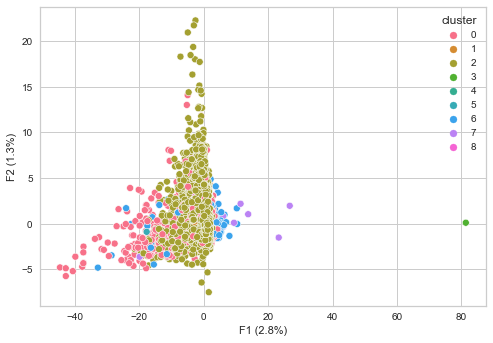

In [177]:
# affichage de 4 dimentions
pca4 = PCA(n_components=4)
pca4_fitted = pca4.fit(X50perc_robustscaled)
pca4_X50perc_robustscaled = pd.DataFrame(pca4_fitted.transform(X50perc_robustscaled),columns=['PC1','PC2','PC3','PC4'])
pca4_X50perc_robustscaled['cluster'] = pd.Categorical(cluster_labels)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca4_X50perc_robustscaled)
# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca4.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca4.explained_variance_ratio_[1],1)))
plt.show()
sns.scatterplot(x="PC3",y="PC4",hue="cluster",data=pca4_X50perc_robustscaled)
# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca4.explained_variance_ratio_[2],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca4.explained_variance_ratio_[3],1)))

In [201]:
X50perc_robustscaled_clusted = X_50perc_sample.copy()

In [207]:
len(np.unique(cluster_labels))

9

In [203]:
X50perc_robustscaled_clusted['clusters_robustsc_kmeans']= pd.Categorical(cluster_labels)

<Figure size 576x396 with 0 Axes>

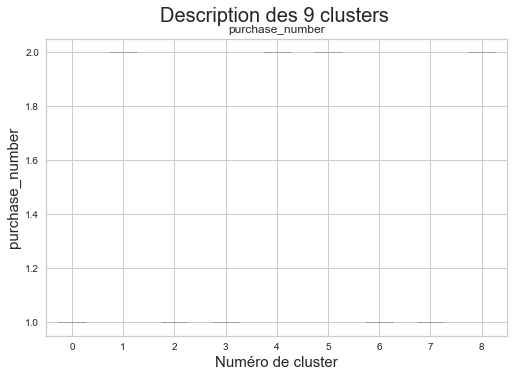

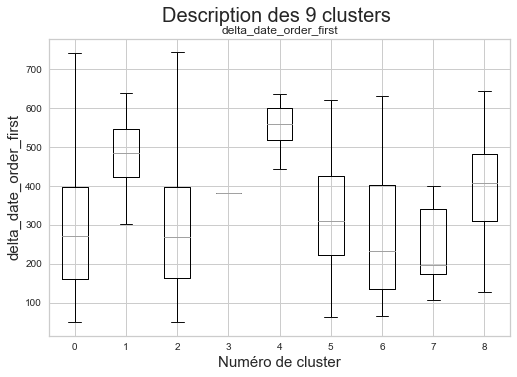

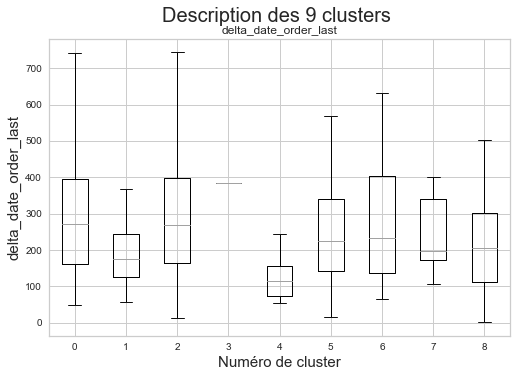

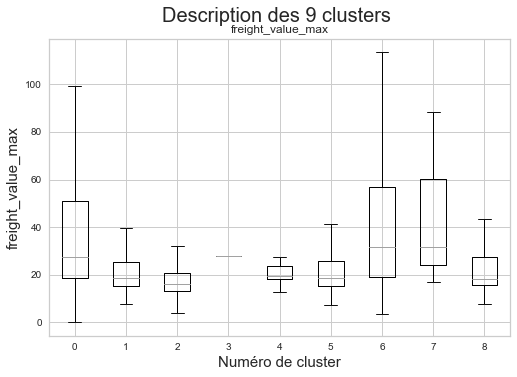

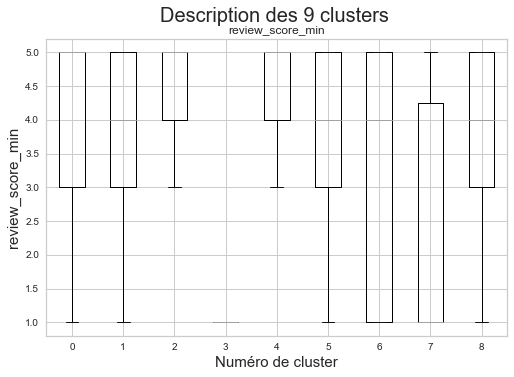

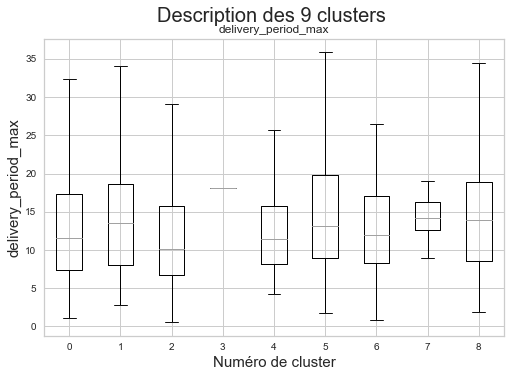

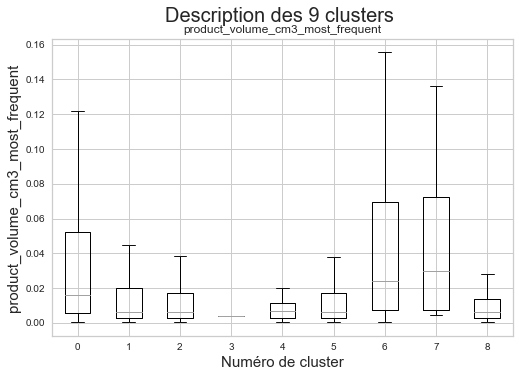

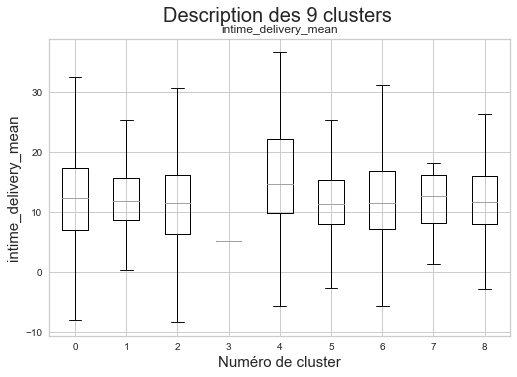

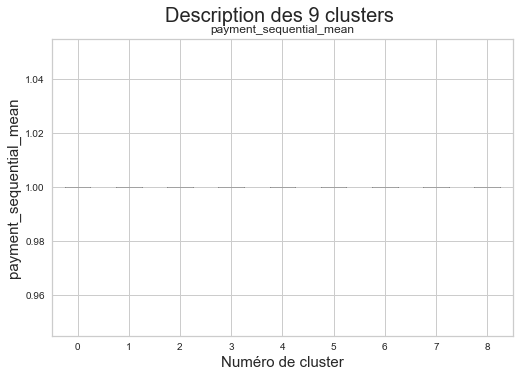

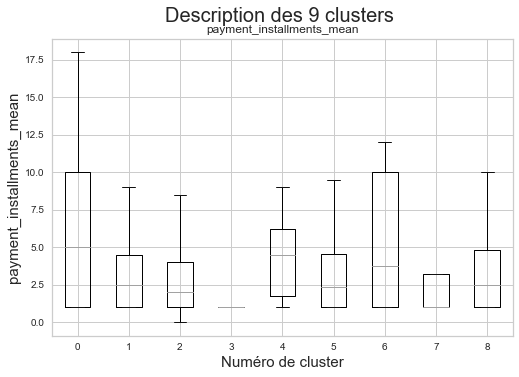

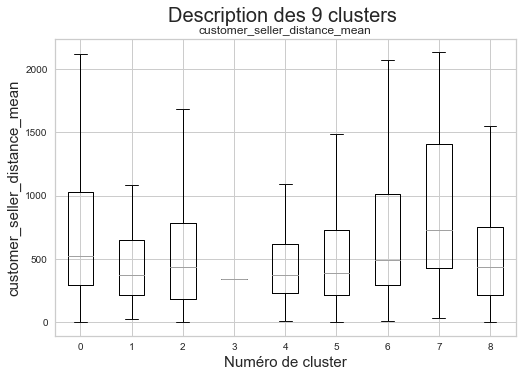

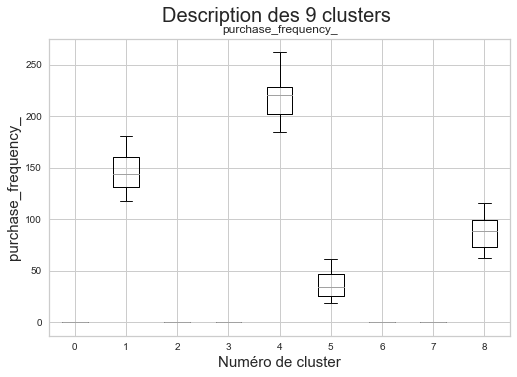

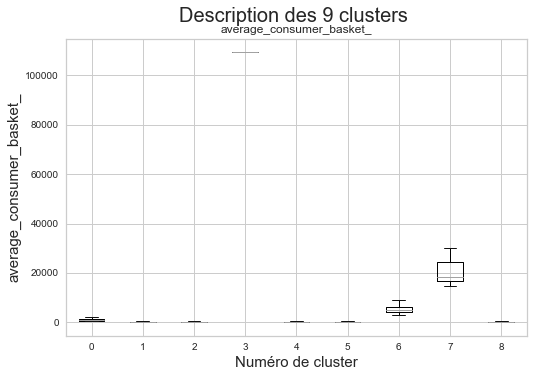

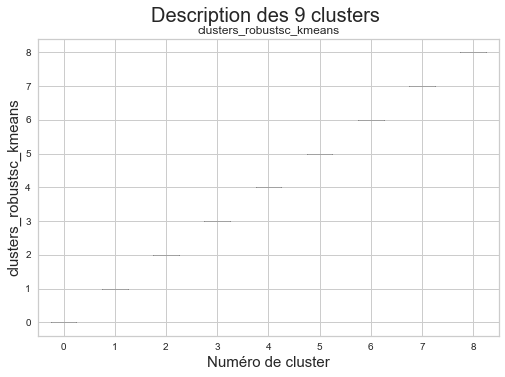

In [208]:
plt.figure()

for col in X50perc_robustscaled_clusted.columns:
    X50perc_robustscaled_clusted.boxplot(column=[col], by= X50perc_robustscaled_clusted['clusters_robustsc_kmeans'], showfliers=False)
# plt.title('AAA')
    plt.suptitle(f'Description des {len(np.unique(cluster_labels))} clusters ', fontsize = 20) # 
    plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel(f'{col}', fontsize = 15) # y-axis label with fontsize 15
    plt.show()

For n_clusters = 3 The average silhouette_score is : 0.9642150774621567


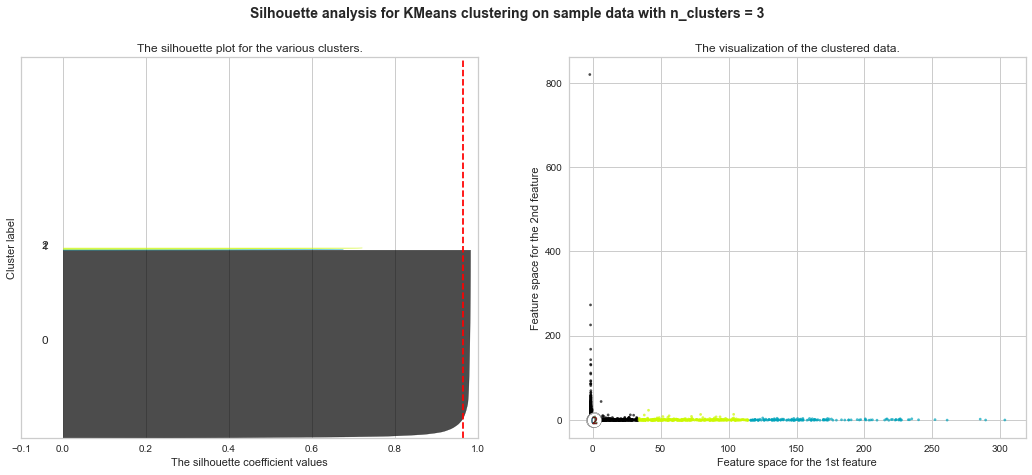

In [227]:
# RobustScaler()
# Create a subplot with 1 row and 2 columns
n_clusters = 3
# n_components = 2
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X50perc_robustscaled)
kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(reduced_data)
estimator_RobustScaler = make_pipeline(RobustScaler(), kmeans).fit(X_50perc_sample)
cluster_labels = kmeans.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

# Test de QuantileTransformer <a class="anchor" id="quantile_transformer"></a>

In [209]:
#qt = QuantileTransformer(n_quantiles=10, random_state=0)
quantrans_X_50perc_sample = preprocessing.QuantileTransformer(random_state=0).fit(X_50perc_sample)
X50perc_quantrans = quantrans_X_50perc_sample.transform(X_50perc_sample)

In [210]:
pca_quant = PCA(n_components=8)

In [211]:
pca_quant.fit(X50perc_quantrans)

PCA(n_components=8)

In [212]:
pcs_quant = pca_quant.components_

(-0.7, 0.7)

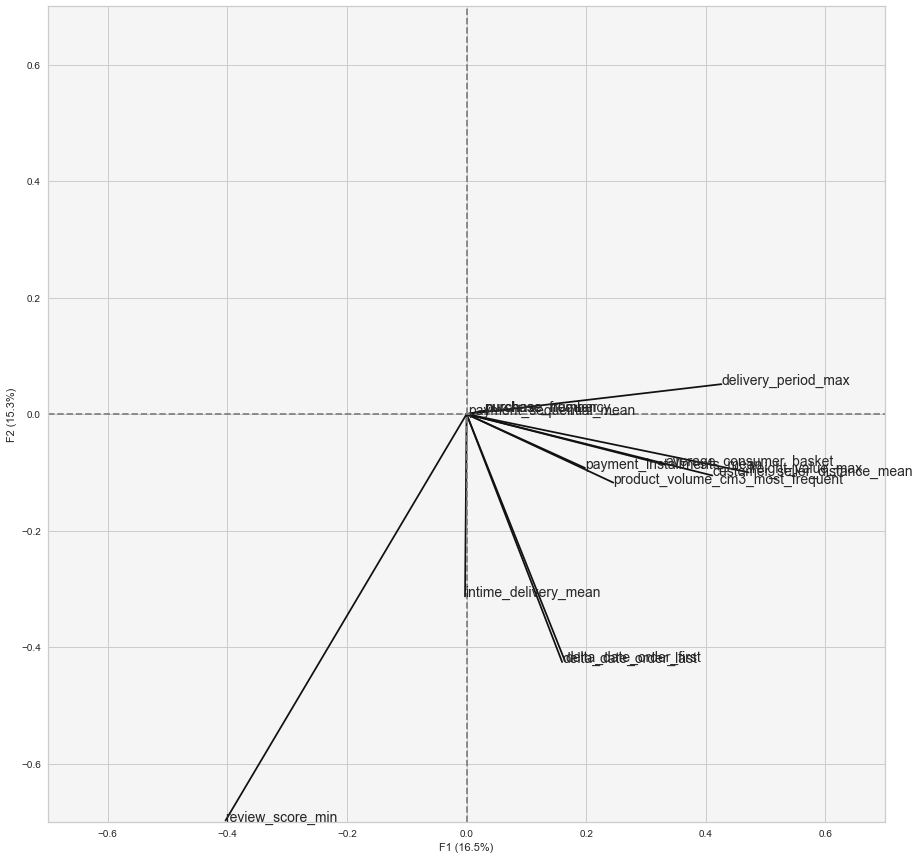

In [213]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs_quant[0, :], pcs_quant[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

    
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*acp.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*acp.explained_variance_ratio_[1],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(-0.7, 0.7)

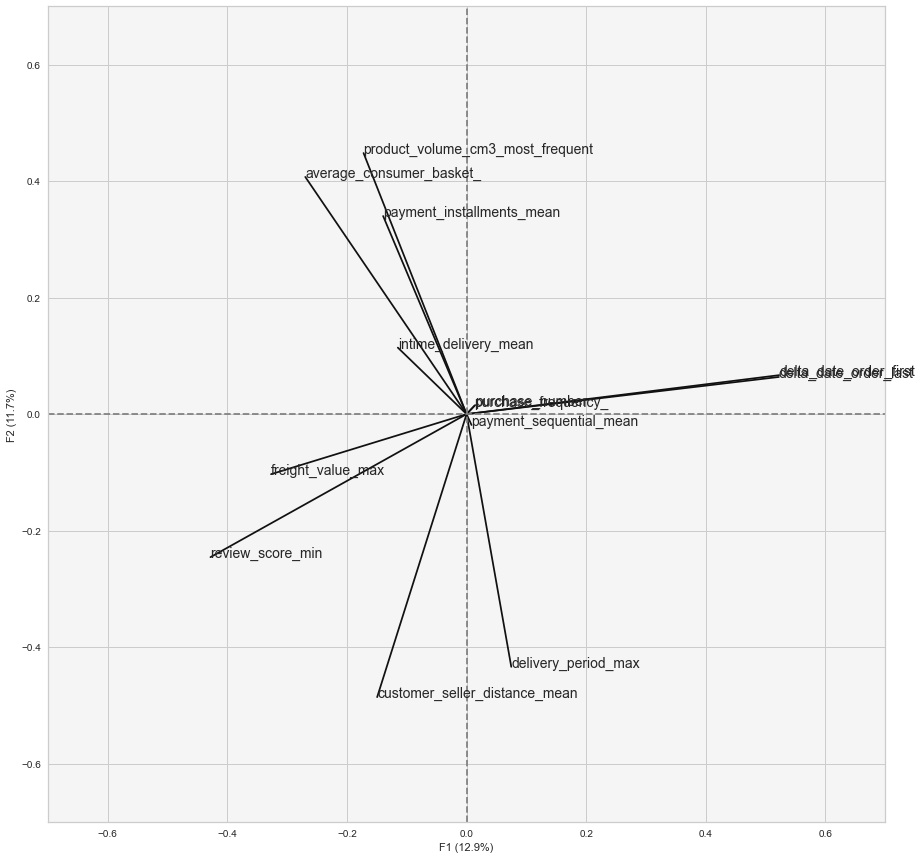

In [216]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs_quant[2, :], pcs_quant[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

    
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*acp.explained_variance_ratio_[2],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*acp.explained_variance_ratio_[3],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(-0.7, 0.7)

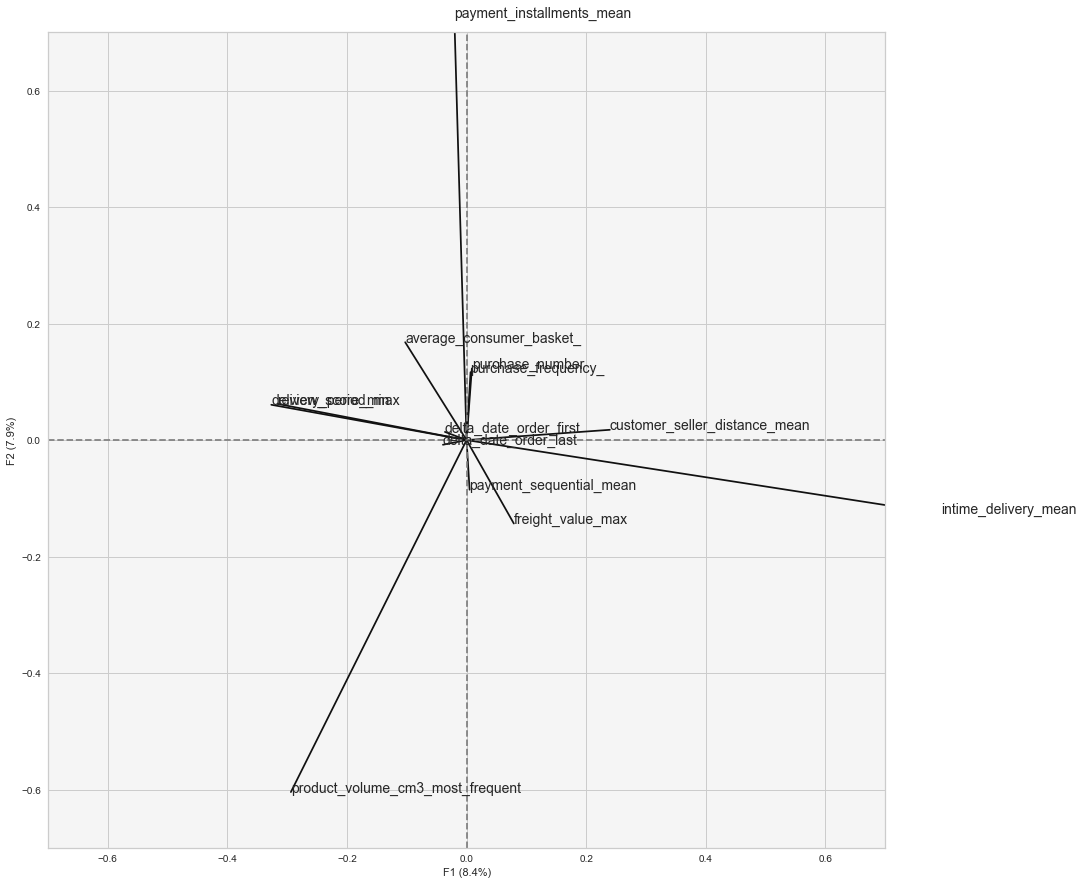

In [217]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs_quant[4, :], pcs_quant[5, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

    
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*acp.explained_variance_ratio_[4],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*acp.explained_variance_ratio_[5],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [218]:
#QuantileTransformer(random_state=0), PCA(n_components=n)

df_res_quantrans_kmeans = pd.DataFrame(columns=['n_components', 'n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])


for n in range(2,10):
    for k in range(3,10):
        pca = PCA(n_components=n)
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        estimator = make_pipeline(QuantileTransformer(random_state=0), pca, kmeans).fit(X_50perc_sample)
        labels_k = kmeans.labels_
        #print(data["clusters"])
        inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center = SSE
        db_score = davies_bouldin_score(X_50perc_sample, labels_k)
        silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
        df_res_quantrans_kmeans = df_res_quantrans_kmeans.append({'n_components':n, 'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_quantrans_kmeans = df_res_quantrans_kmeans.set_index('n_clusters')

n_components : 2


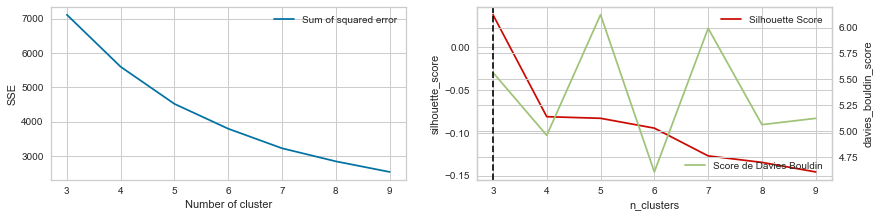

n_components : 3


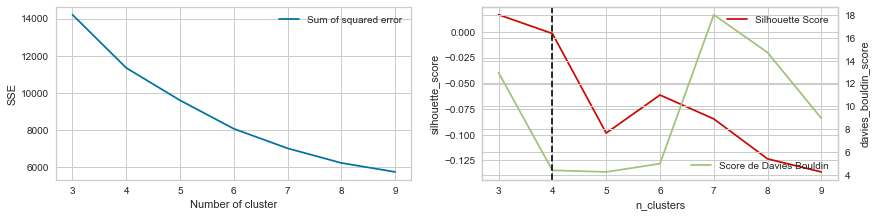

n_components : 4


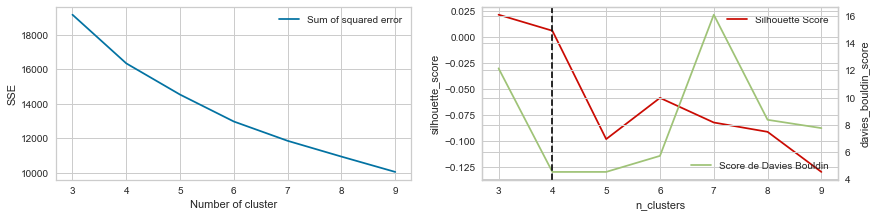

n_components : 5


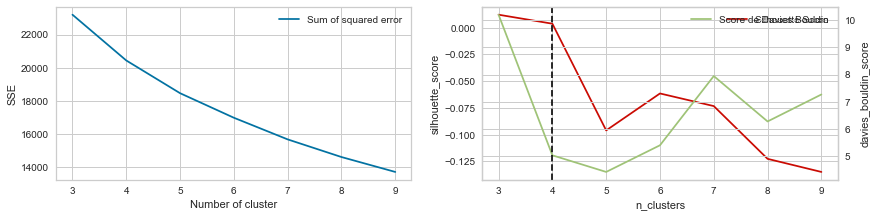

n_components : 6


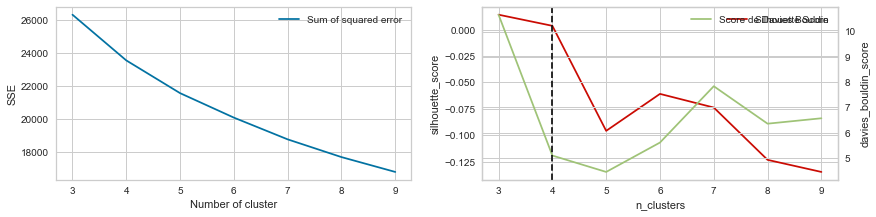

n_components : 7


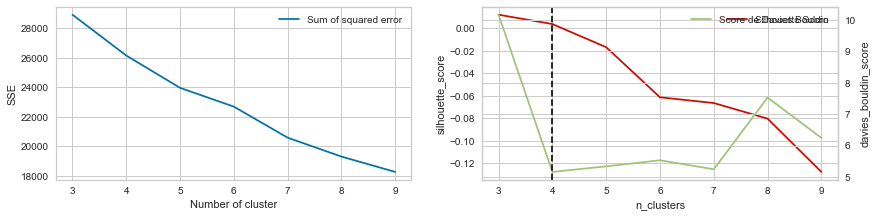

n_components : 8


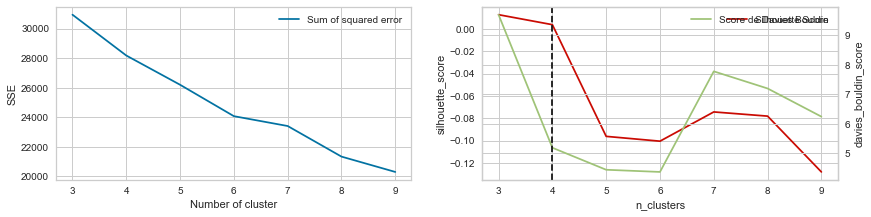

n_components : 9


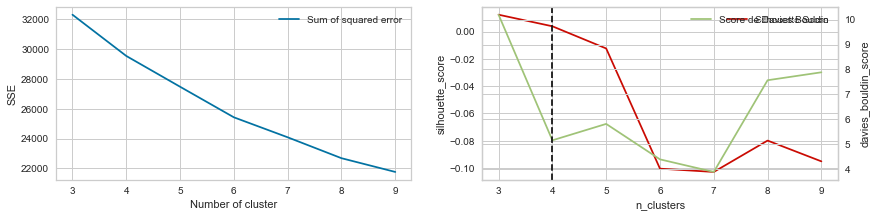

In [220]:
plotscore_kmeans(df_res_quantrans_kmeans, 10)

For n_clusters = 4 The average silhouette_score is : 0.18830849828882154


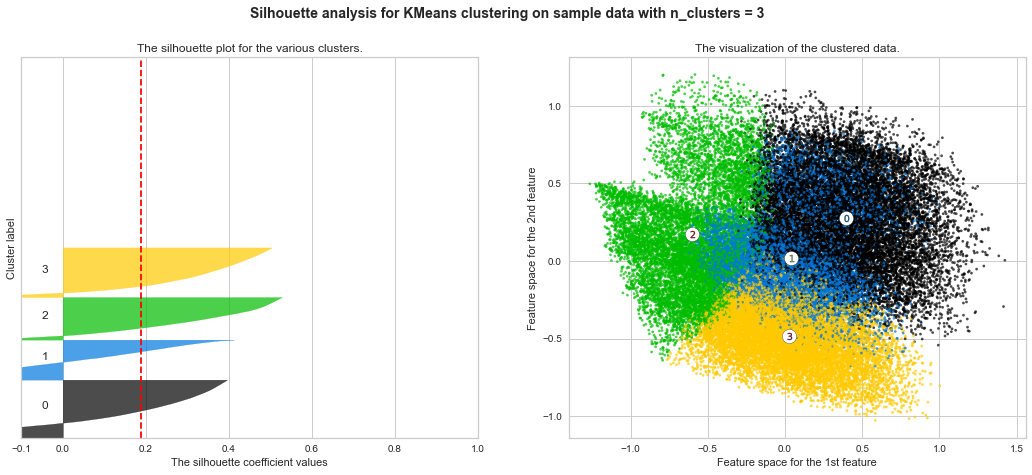

In [222]:
# QuantileTransformer(random_state=0)
# Create a subplot with 1 row and 2 columns
n_clusters = 4
n_components = 7
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X50perc_quantrans)
kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(reduced_data)
estimator_QuantileTransformer = make_pipeline(QuantileTransformer(random_state=0), PCA(n_components=n_components), kmeans).fit(X_50perc_sample)
cluster_labels = kmeans.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

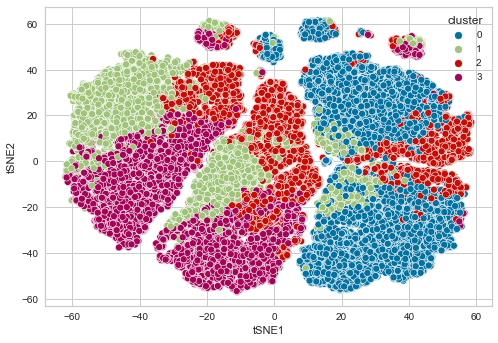

In [223]:
# affichage tSNE
# tsne_affichage = TSNE(n_components=2)
# QuantileTransformer(random_state=0)
X50perc_quantransf_tsne = pd.DataFrame(tsne_affichage.fit_transform(X50perc_quantrans),columns=['tSNE1','tSNE2'])
X50perc_quantransf_tsne['cluster'] = pd.Categorical(cluster_labels)
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster",data=X50perc_quantransf_tsne)

In [224]:
X50perc_quantransf_clusted = X_50perc_sample.copy()

In [225]:
X50perc_quantransf_clusted['clusters_quantransf_kmeans']= pd.Categorical(cluster_labels)

<Figure size 576x396 with 0 Axes>

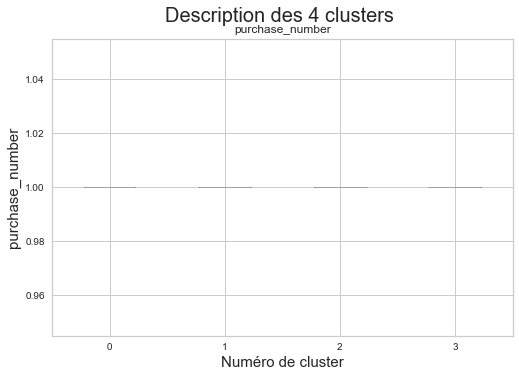

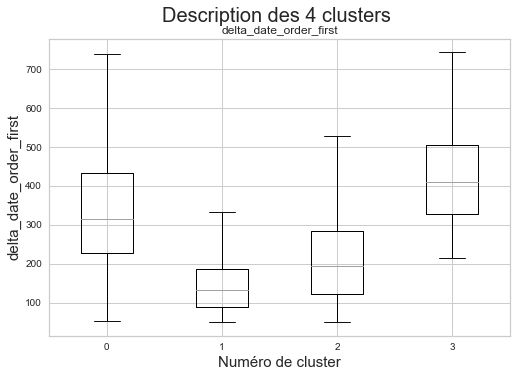

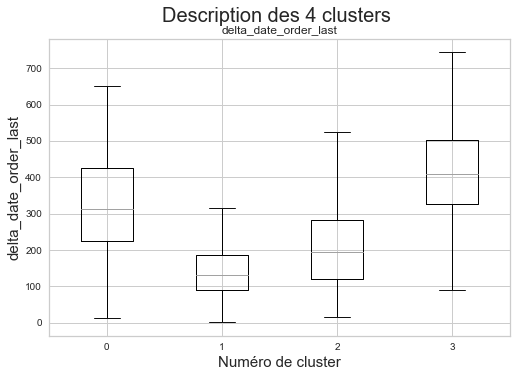

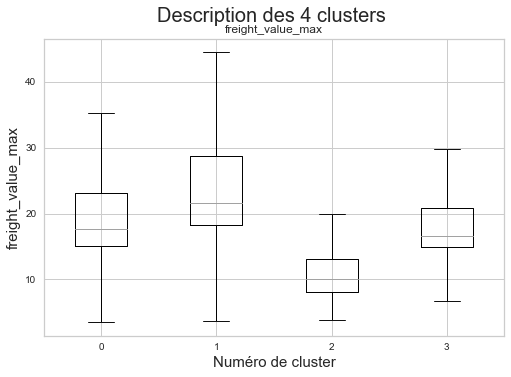

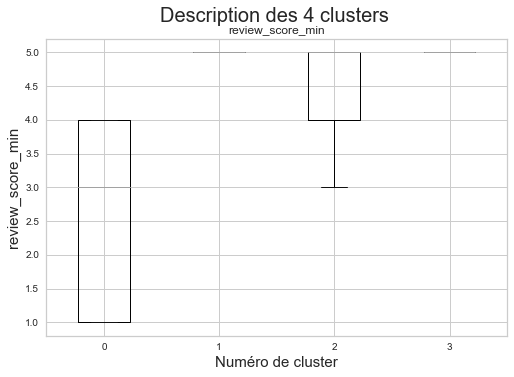

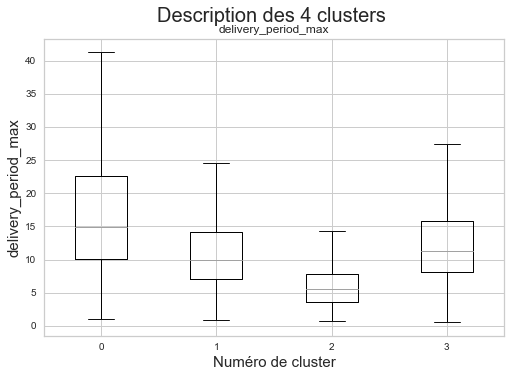

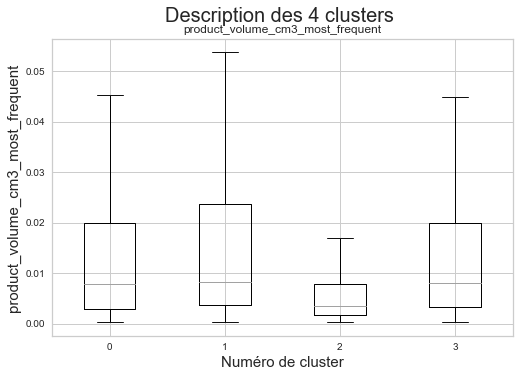

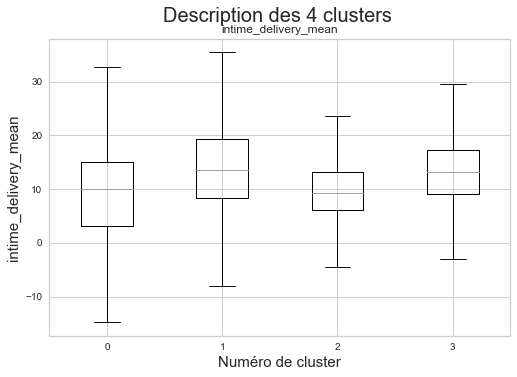

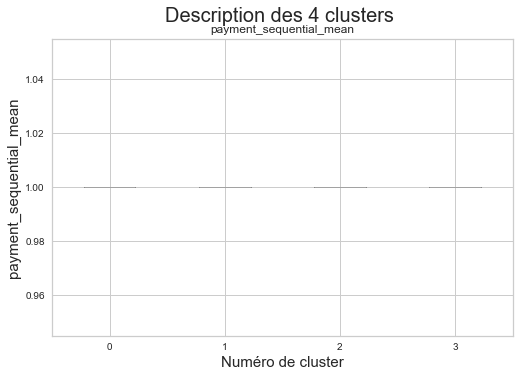

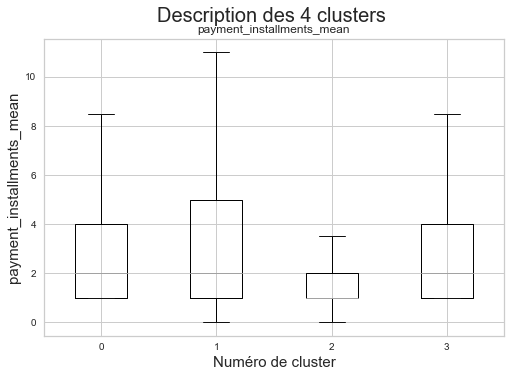

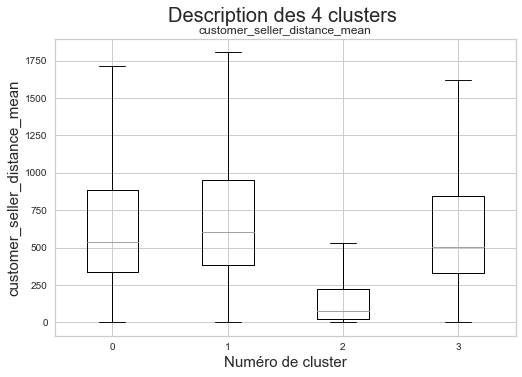

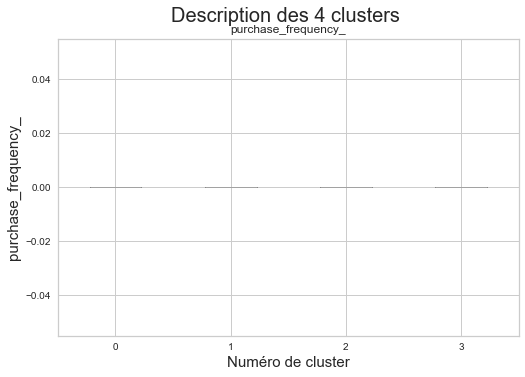

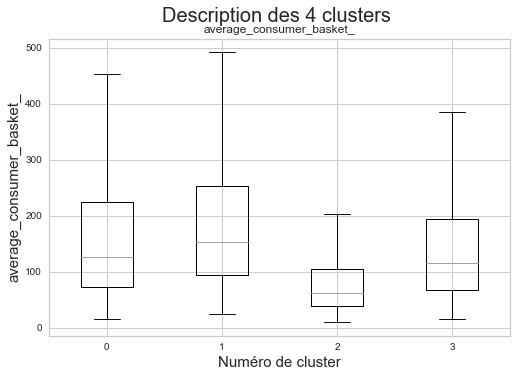

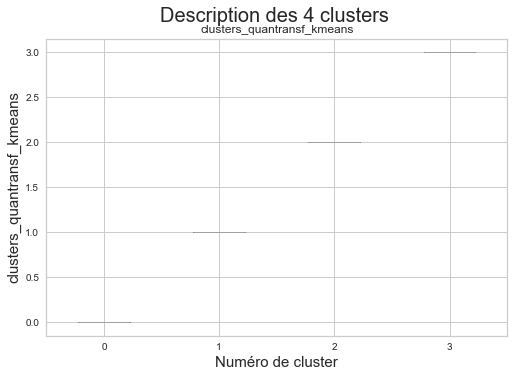

In [226]:
plt.figure()

for col in X50perc_quantransf_clusted.columns:
    X50perc_quantransf_clusted.boxplot(column=[col], by= X50perc_quantransf_clusted['clusters_quantransf_kmeans'], showfliers=False)
# plt.title('AAA')
    plt.suptitle(f'Description des {len(np.unique(cluster_labels))} clusters ', fontsize = 20) # 
    plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel(f'{col}', fontsize = 15) # y-axis label with fontsize 15
    plt.show()

For n_clusters = 3 The average silhouette_score is : 0.3164314644557752


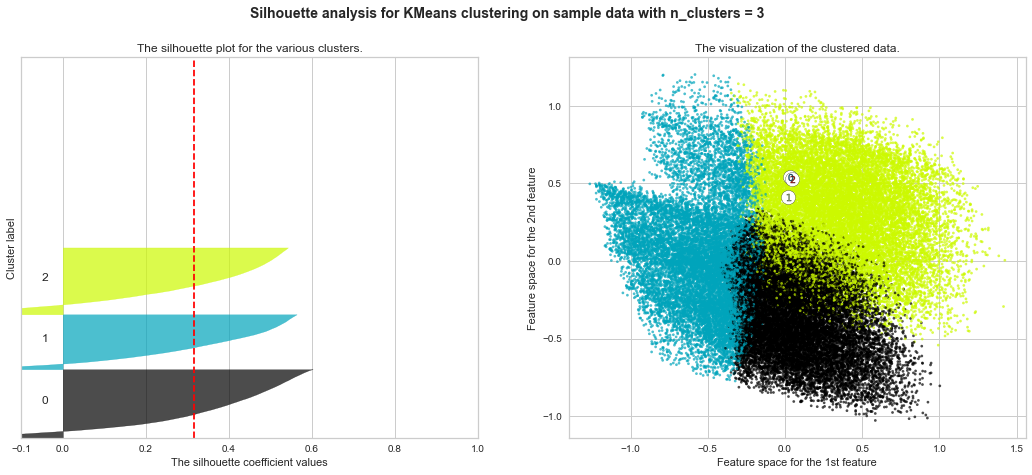

In [228]:
# QuantileTransformer(random_state=0)
# Create a subplot with 1 row and 2 columns
n_clusters = 3
# n_components = 7
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X50perc_quantrans)
kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(reduced_data)
estimator_QuantileTransformer = make_pipeline(QuantileTransformer(random_state=0), kmeans).fit(X_50perc_sample)
cluster_labels = kmeans.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()